In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%qtconsole
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import loren_frank_data_processing as lfdp

import logging
logging.basicConfig(level=logging.INFO)

The goal of this notebook is to make sure the linear distances and classification of trials is done properly for each epoch.

In [3]:
from src.parameters import ANIMALS

epoch_info = lfdp.make_epochs_dataframe(ANIMALS)
epoch_info

environment   type  exposure
animal day epoch                                    
JZ1    1   1                  sleep  sleep       NaN
           2                 wtrack    run       1.0
           3                  sleep  sleep       NaN
           4                 wtrack    run       2.0
           5                  sleep  sleep       NaN
           6              openfield    run       1.0
           7                  sleep  sleep       NaN
           8              openfield    run       2.0
           9                  sleep  sleep       NaN
       2   1                  sleep  sleep       NaN
           2                 wtrack    run       3.0
           3                  sleep  sleep       NaN
           4                 wtrack    run       4.0
           5                  sleep  sleep       NaN
           6              openfield    run       3.0
           7                  sleep  sleep       NaN
           8              openfield    run       4.0
           9                  sleep  sleep       NaN
       3   1                  sleep  sleep       NaN
           2                 wtrack    run       5.0
           3                  sleep  sleep       NaN
           4                 wtrack    run       6.0
           5                  sleep  sleep       NaN
           6              openfield    run       5.0
           7                  sleep  sleep       NaN
           8              openfield    run       6.0
           9                  sleep  sleep       NaN
       4   1                  sleep  sleep       NaN
           2                 wtrack    run       7.0
           3                  sleep  sleep       NaN
...                             ...    ...       ...
       11  7                  sleep  sleep       NaN
           8              openfield    run      22.0
           9                  sleep  sleep       NaN
       12  1                  sleep  sleep       NaN
           2      sixarmtrack_right    run       5.0
           3                  sleep  sleep       NaN
           4      sixarmtrack_right    run       6.0
           5                  sleep  sleep       NaN
           6              openfield    run      23.0
           7                  sleep  sleep       NaN
           8              openfield    run      24.0
           9                  sleep  sleep       NaN
       13  1                  sleep  sleep       NaN
           2      sixarmtrack_right    run       7.0
           3                  sleep  sleep       NaN
           4      sixarmtrack_right    run       8.0
           5                  sleep  sleep       NaN
           6              openfield    run      25.0
           7                  sleep  sleep       NaN
           8              openfield    run      26.0
           9                  sleep  sleep       NaN
       14  1                  sleep  sleep       NaN
           2      sixarmtrack_right    run       9.0
           3                  sleep  sleep       NaN
           4      sixarmtrack_right    run      10.0
           5                  sleep  sleep       NaN
           6              openfield    run      27.0
           7                  sleep  sleep       NaN
           8              openfield    run      28.0
           9                  sleep  sleep       NaN

[126 rows x 3 columns]

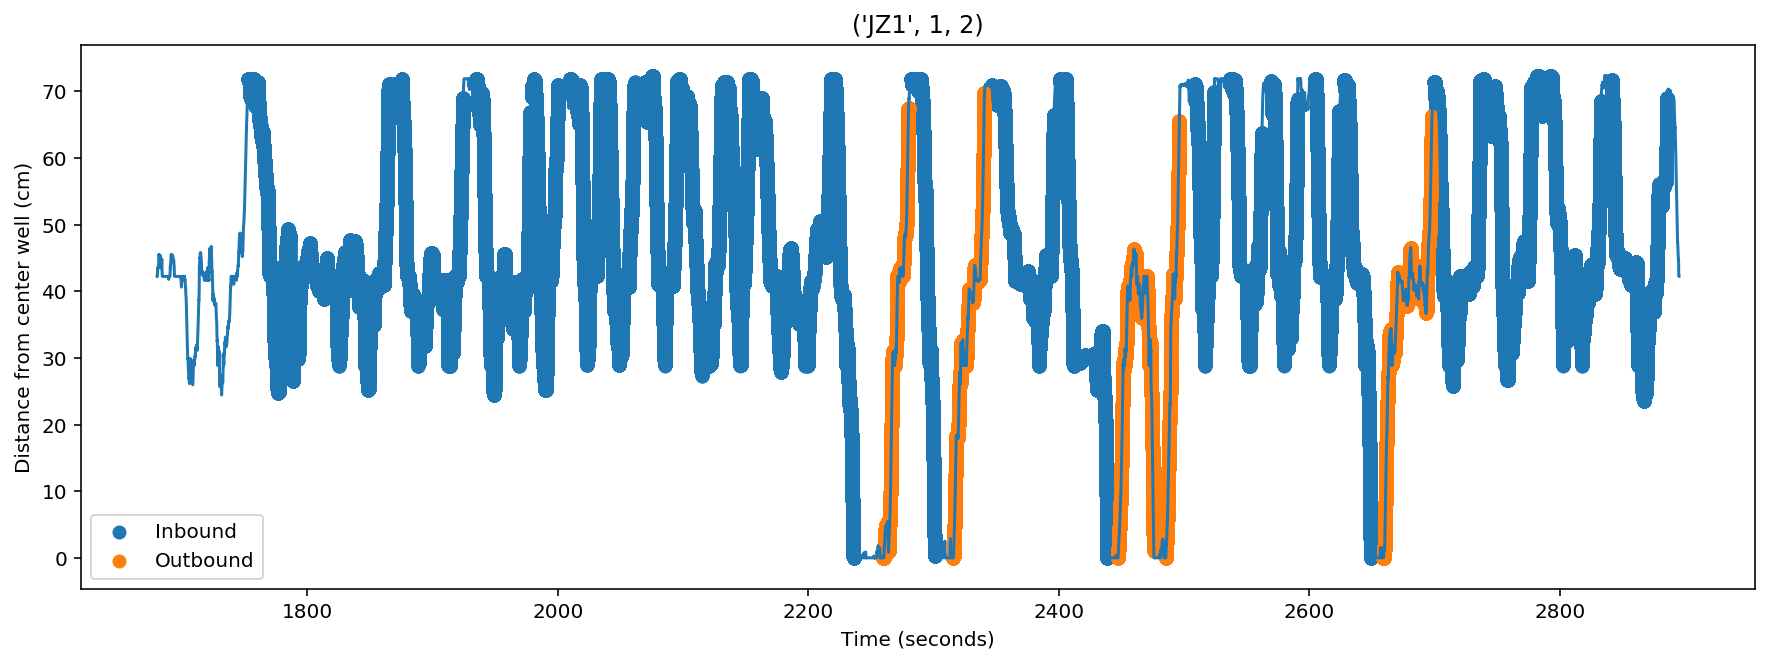

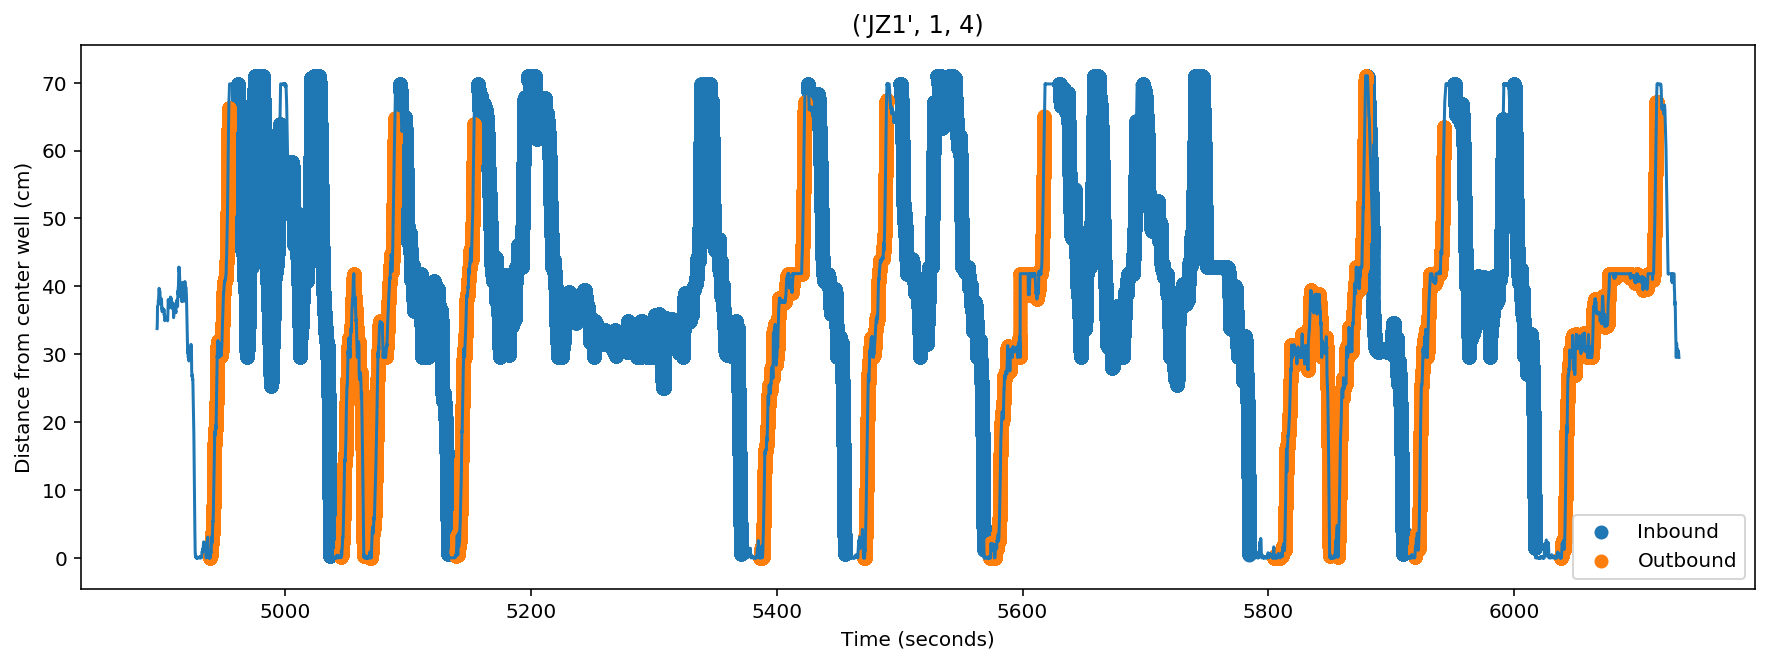

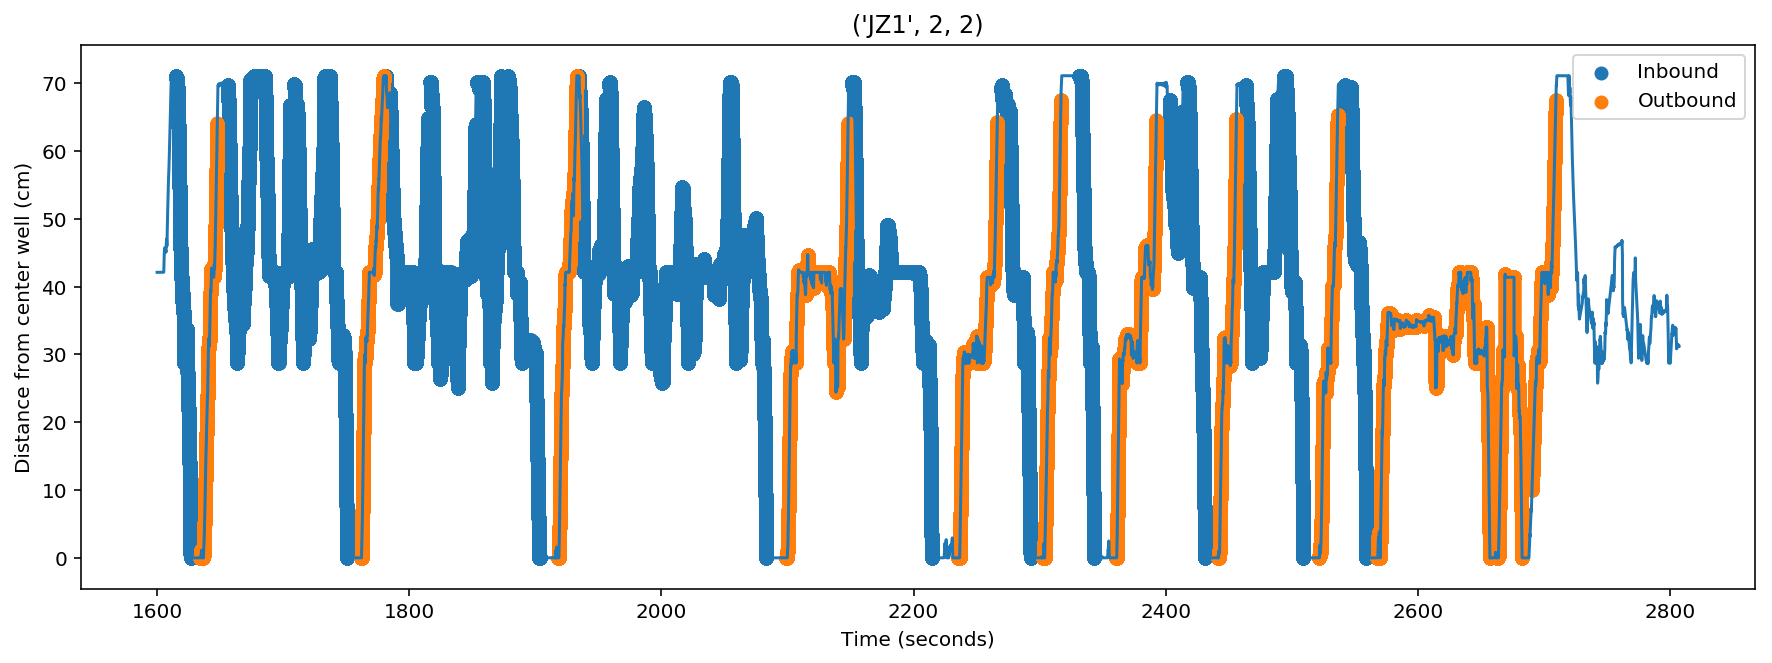

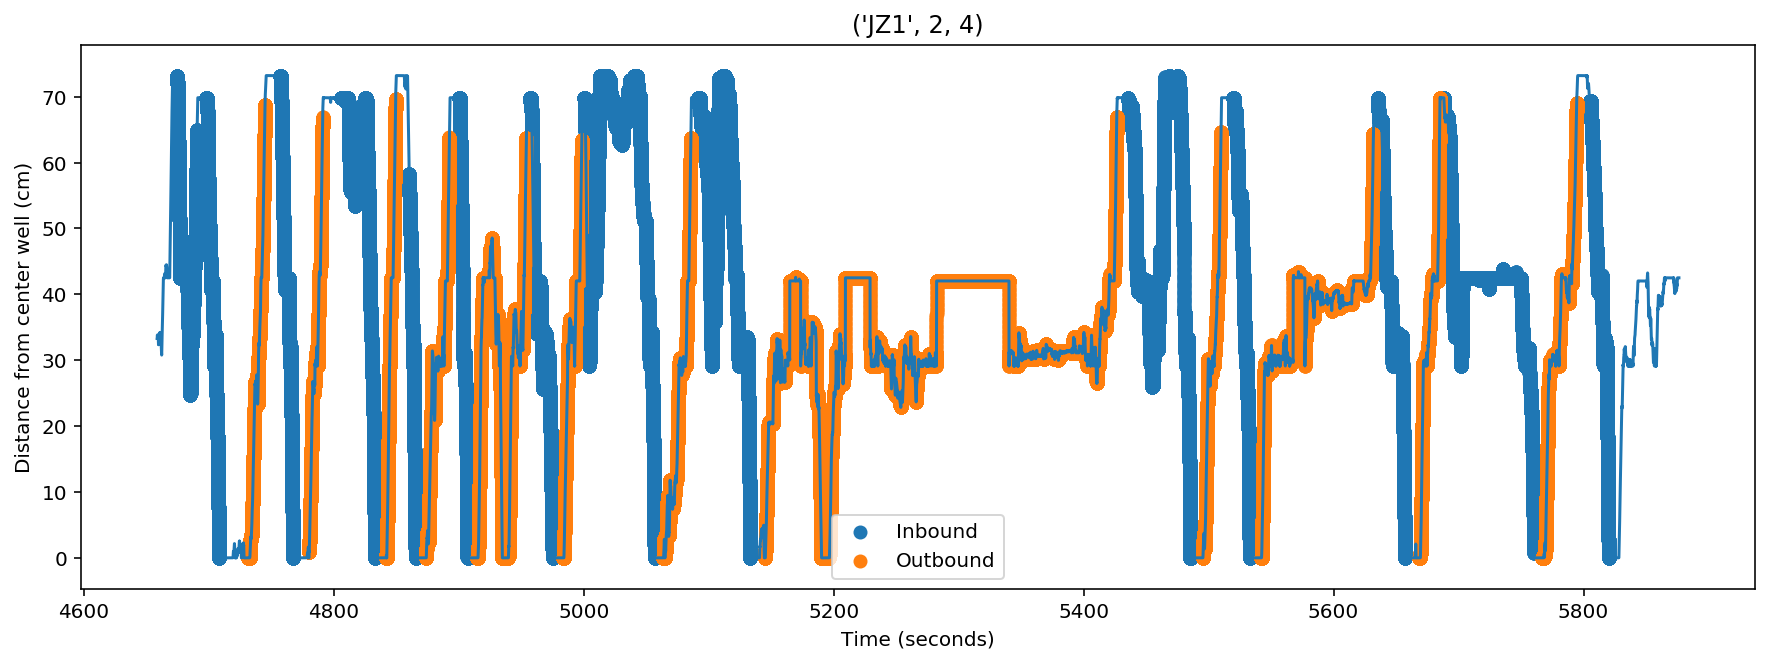

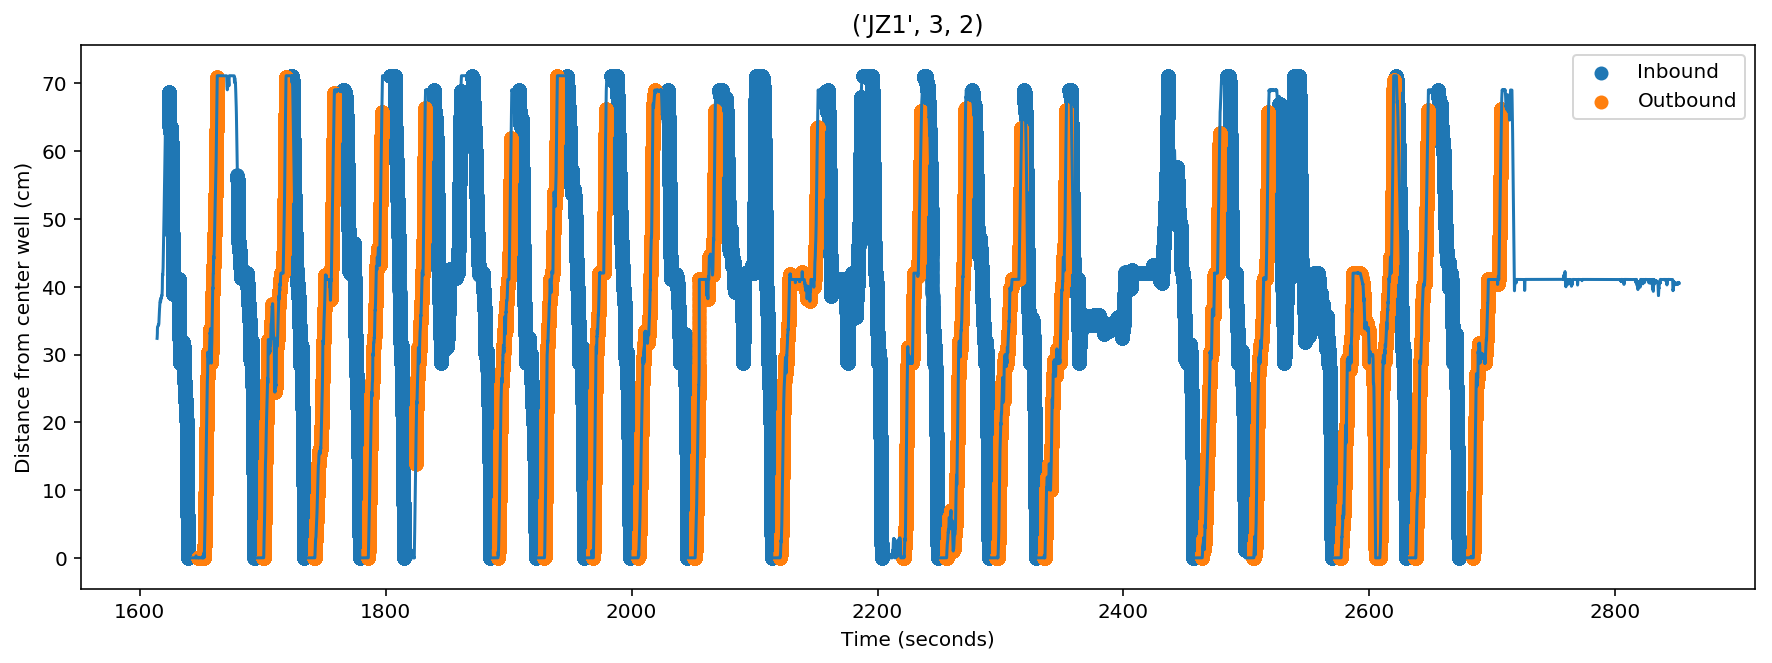

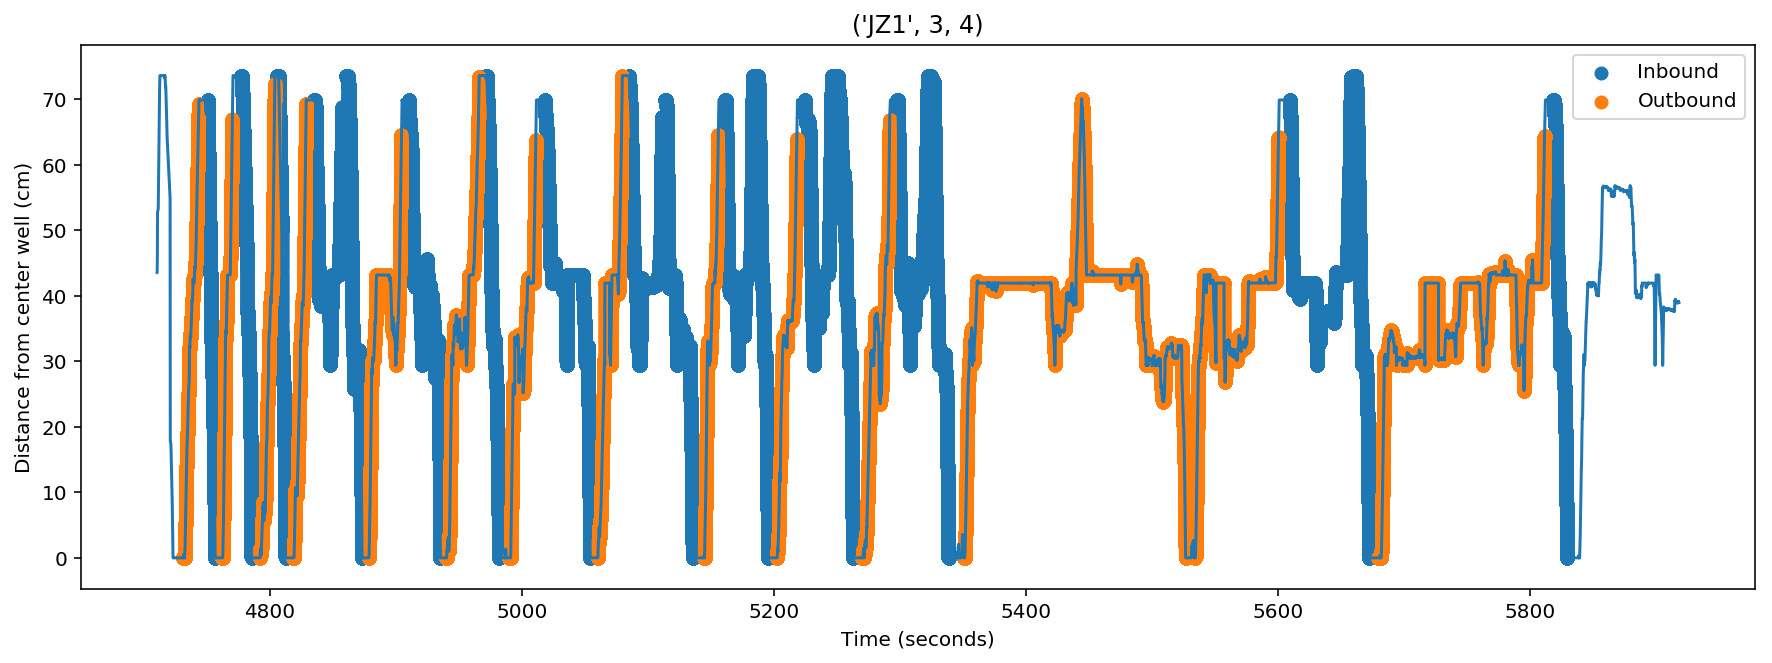

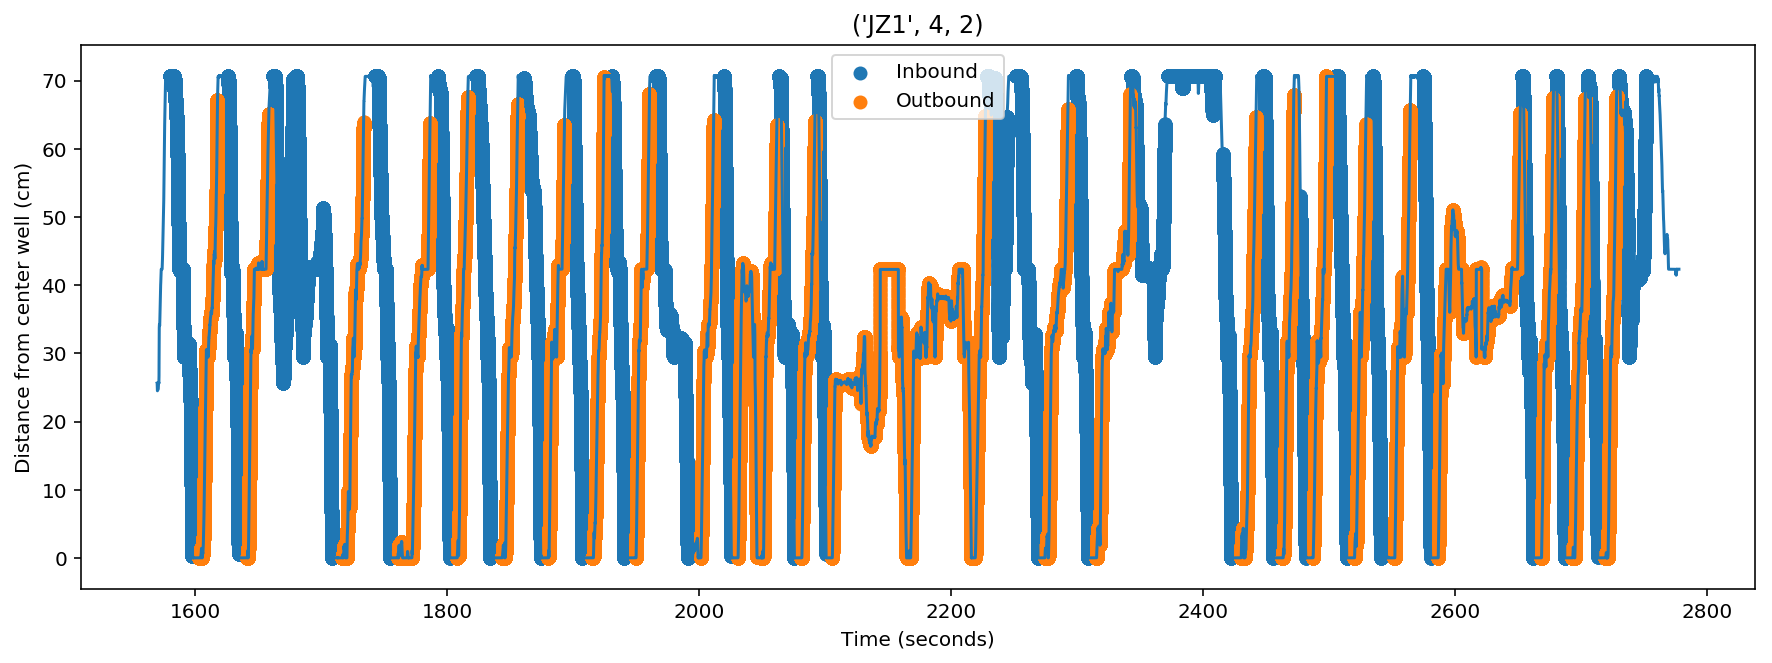

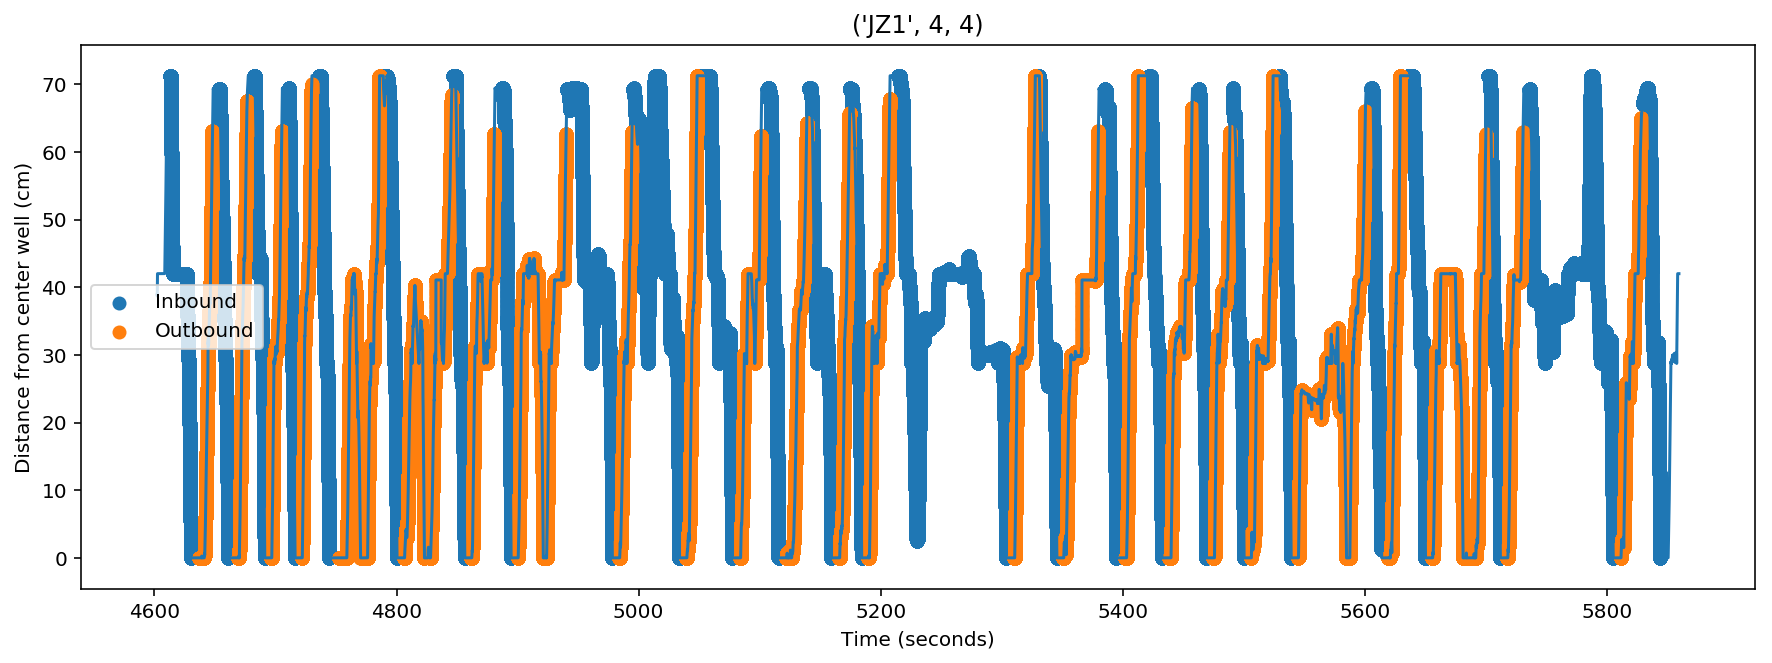

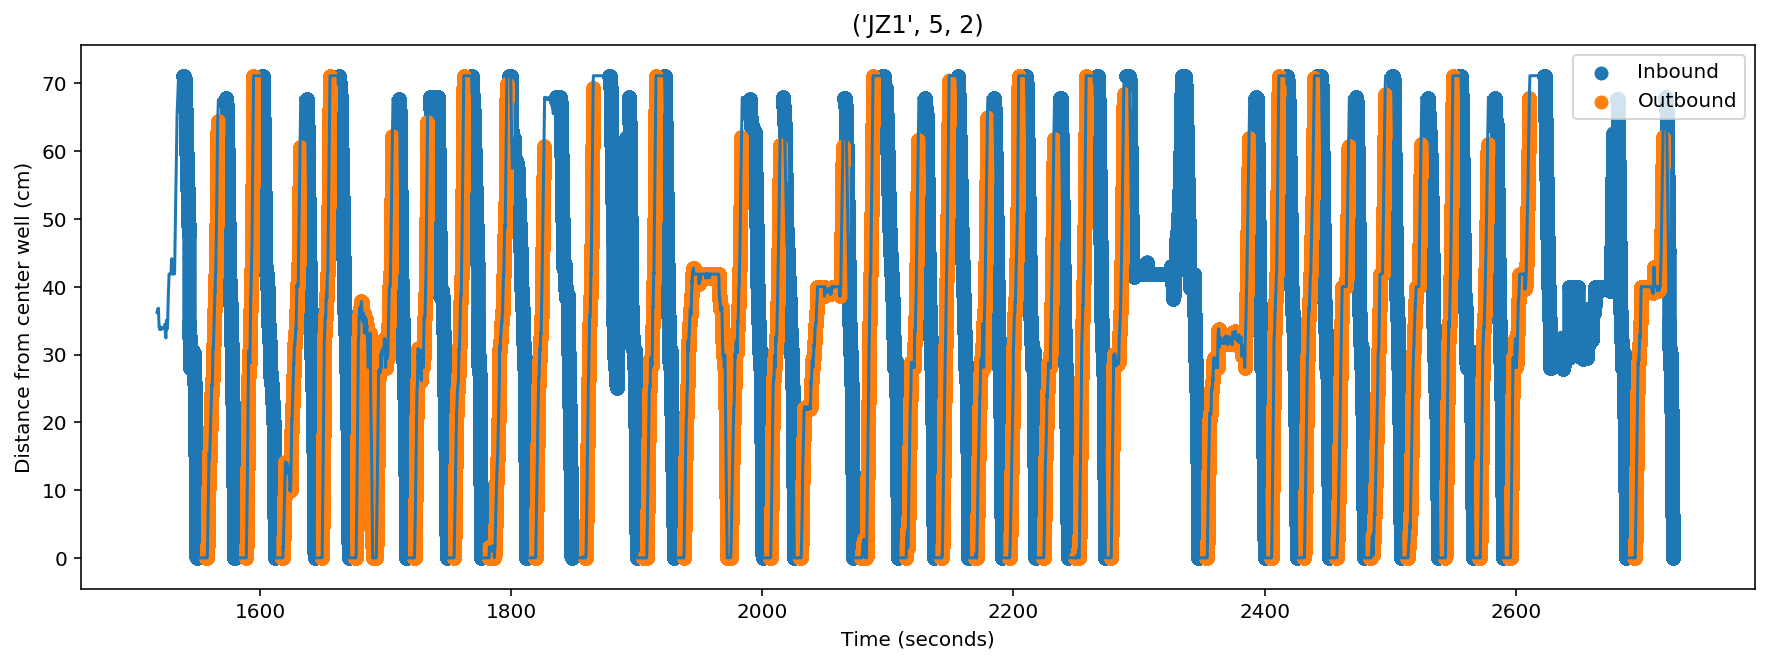

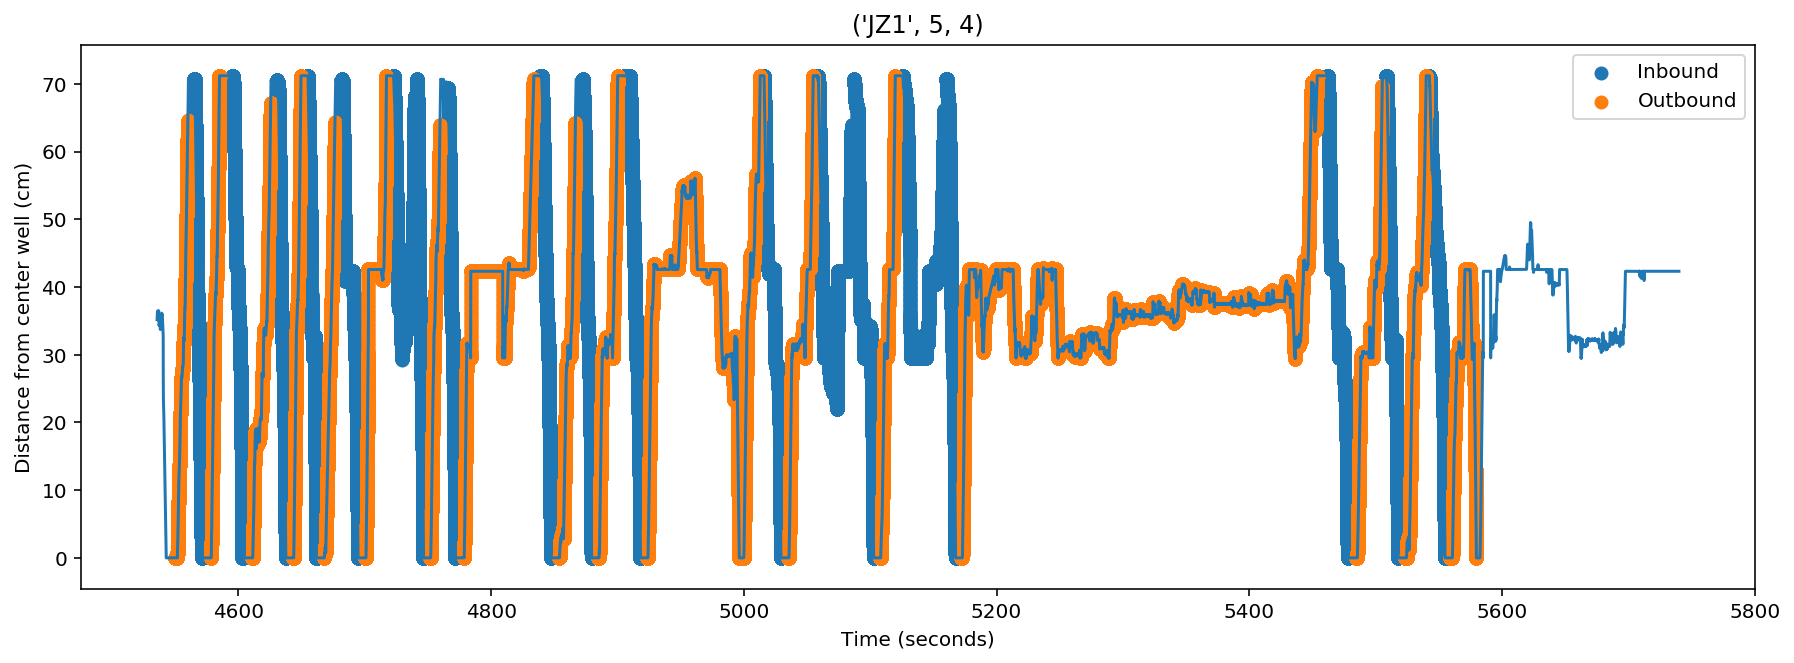

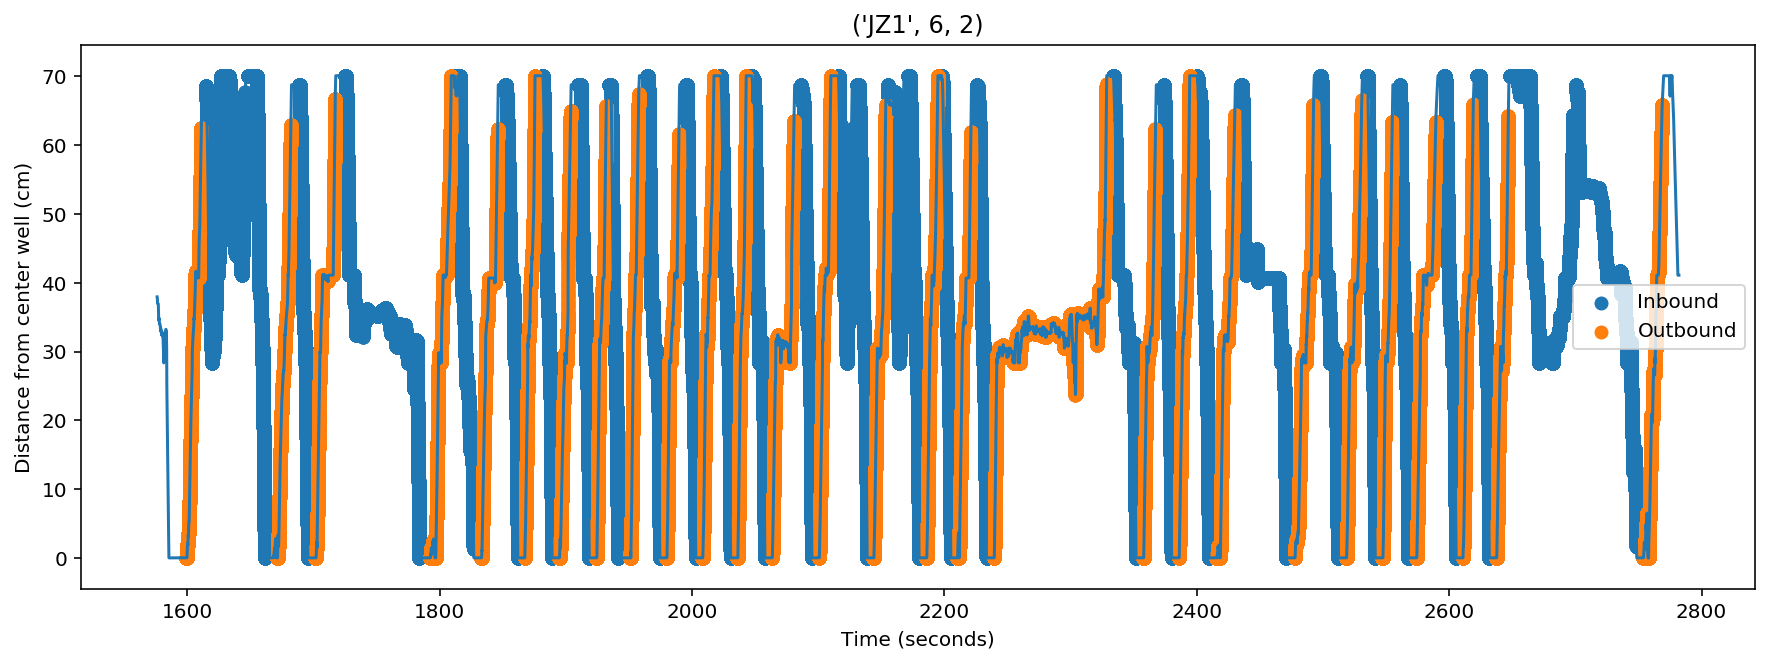

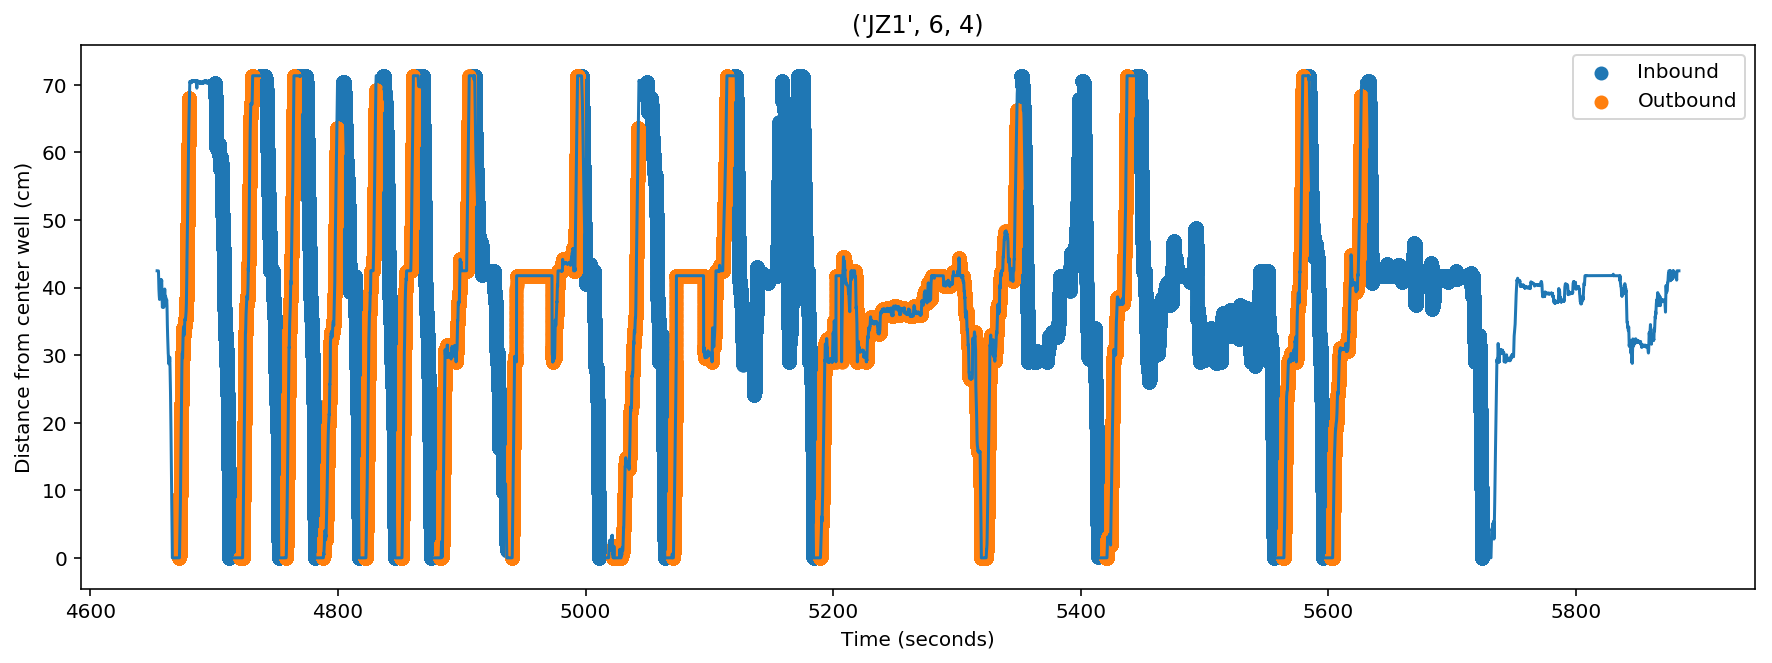

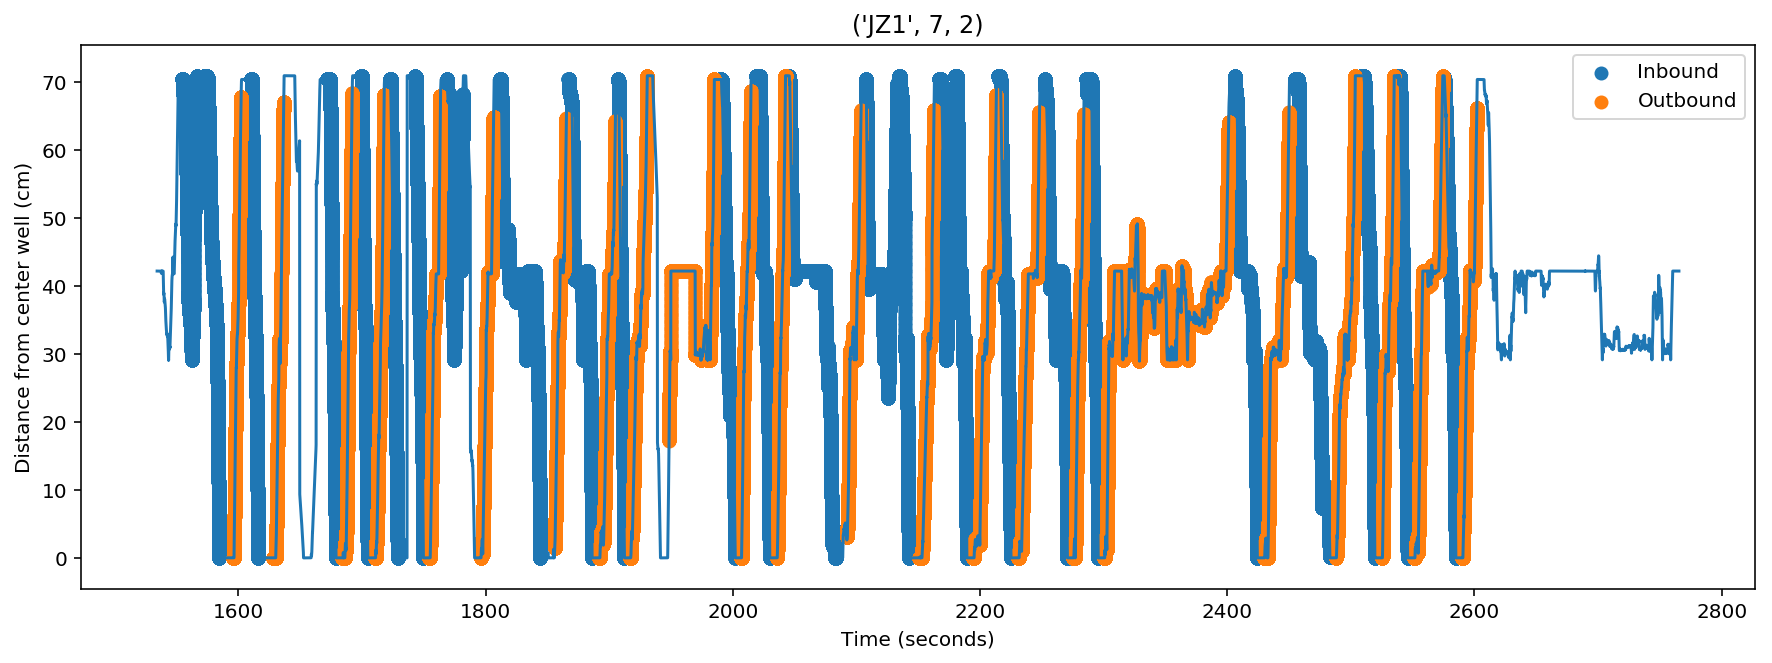

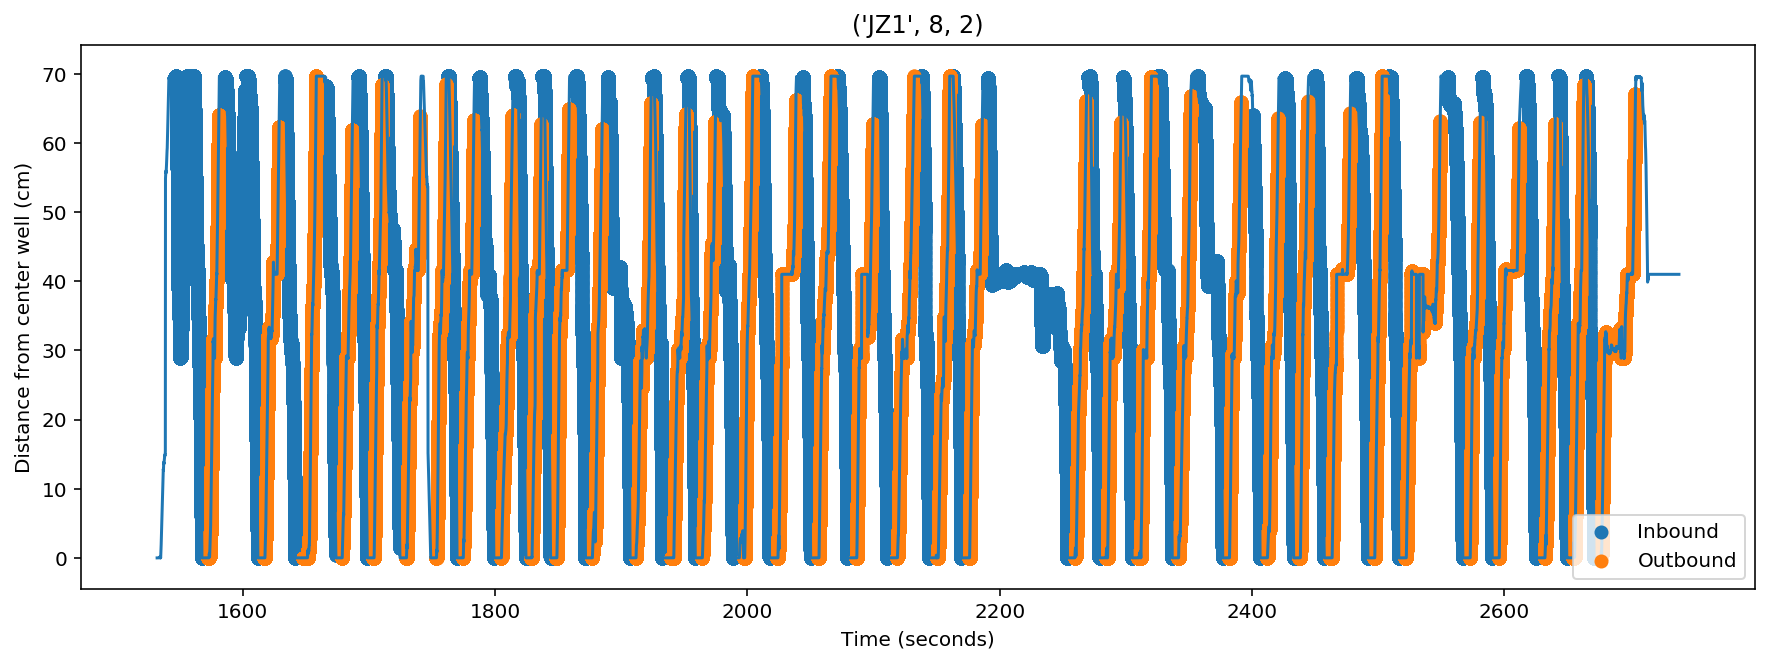

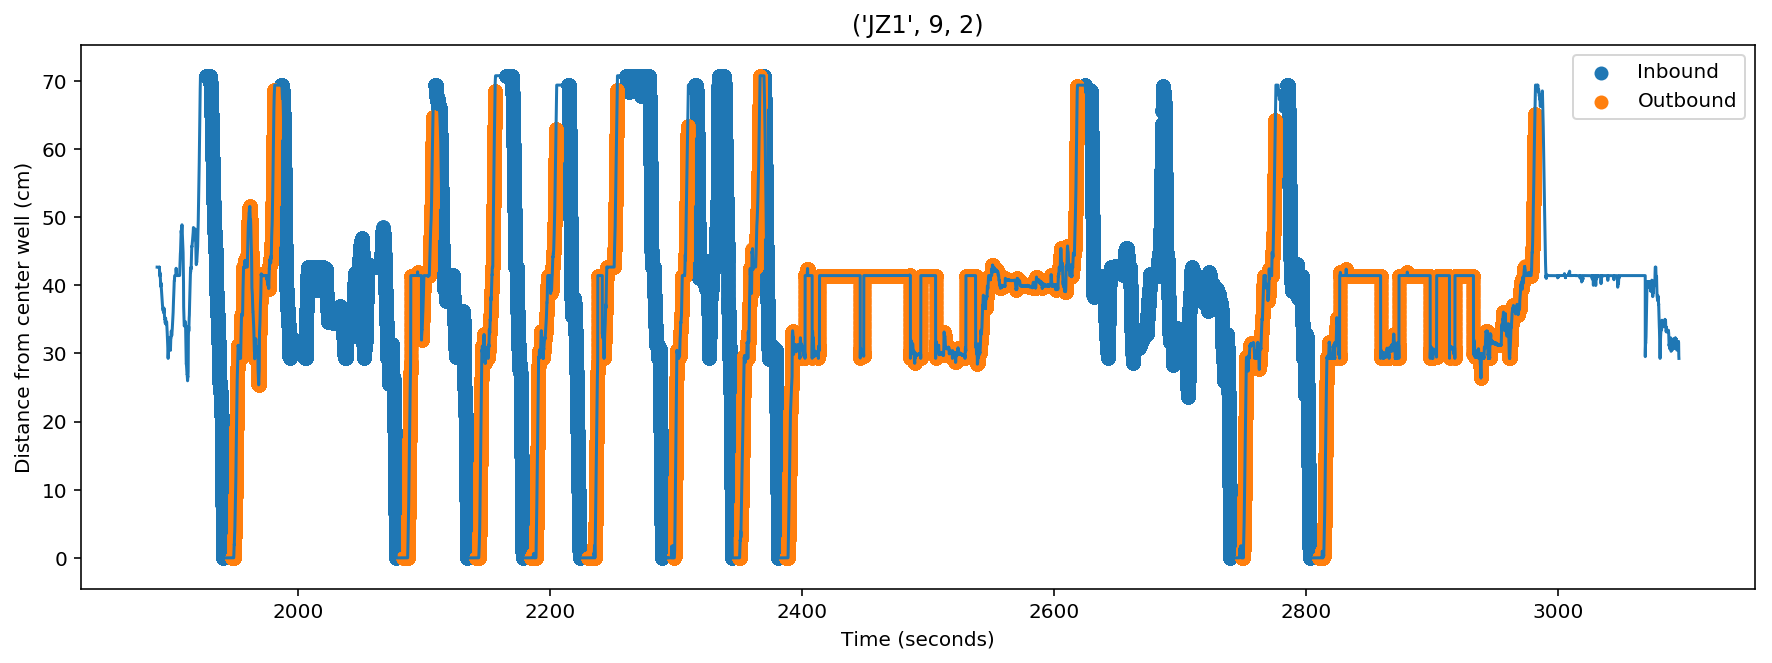

In [5]:
for epoch_key in epoch_info.loc[epoch_info.environment == 'wtrack'].index:
    position_info = lfdp.get_interpolated_position_dataframe(
        epoch_key, ANIMALS)

    plt.figure(figsize=(15, 5))
    plt.plot(position_info.index.total_seconds().values,
             position_info.linear_distance.values)

    for label, df in position_info.groupby('task'):
        plt.scatter(df.index.total_seconds(), df.linear_distance, label=label)

    plt.xlabel('Time (seconds)')
    plt.ylabel('Distance from center well (cm)')
    plt.legend();
    plt.title(epoch_key)
    

Need to double check:
+ ('JZ1', 9, 2)
+ ('JZ1', 7, 2)
+ ('JZ1', 4, 2)
+ ('JZ1', 3, 4)

In [57]:
epoch_key = ('JZ1', 9, 2)
position_info = lfdp.get_interpolated_position_dataframe(
    epoch_key, ANIMALS)

In [58]:
def plot_linear_distance(position_info, time):
    p = position_info.copy().set_index(position_info.index.total_seconds()).loc[time]
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    axes[0].plot(p.index.values, p.linear_distance.values, linewidth=2, label='HMM')
    axes[0].set_xlabel('time')
    axes[0].set_ylabel('distance (cm)')
    axes[0].legend();
    
    axes[1].plot(position_info.x_position.values, position_info.y_position.values)
    axes[1].plot(p.x_position.values, p.y_position.values,
                 linewidth=3)
    axes[1].scatter(p.iloc[0].x_position, p.iloc[0].y_position,
                    label='start', color='lightgreen', s=100, zorder=1000)
    axes[1].scatter(p.iloc[-1].x_position, p.iloc[-1].y_position,
                    label='stop', color='red', s=100, zorder=1000)
    axes[1].legend()

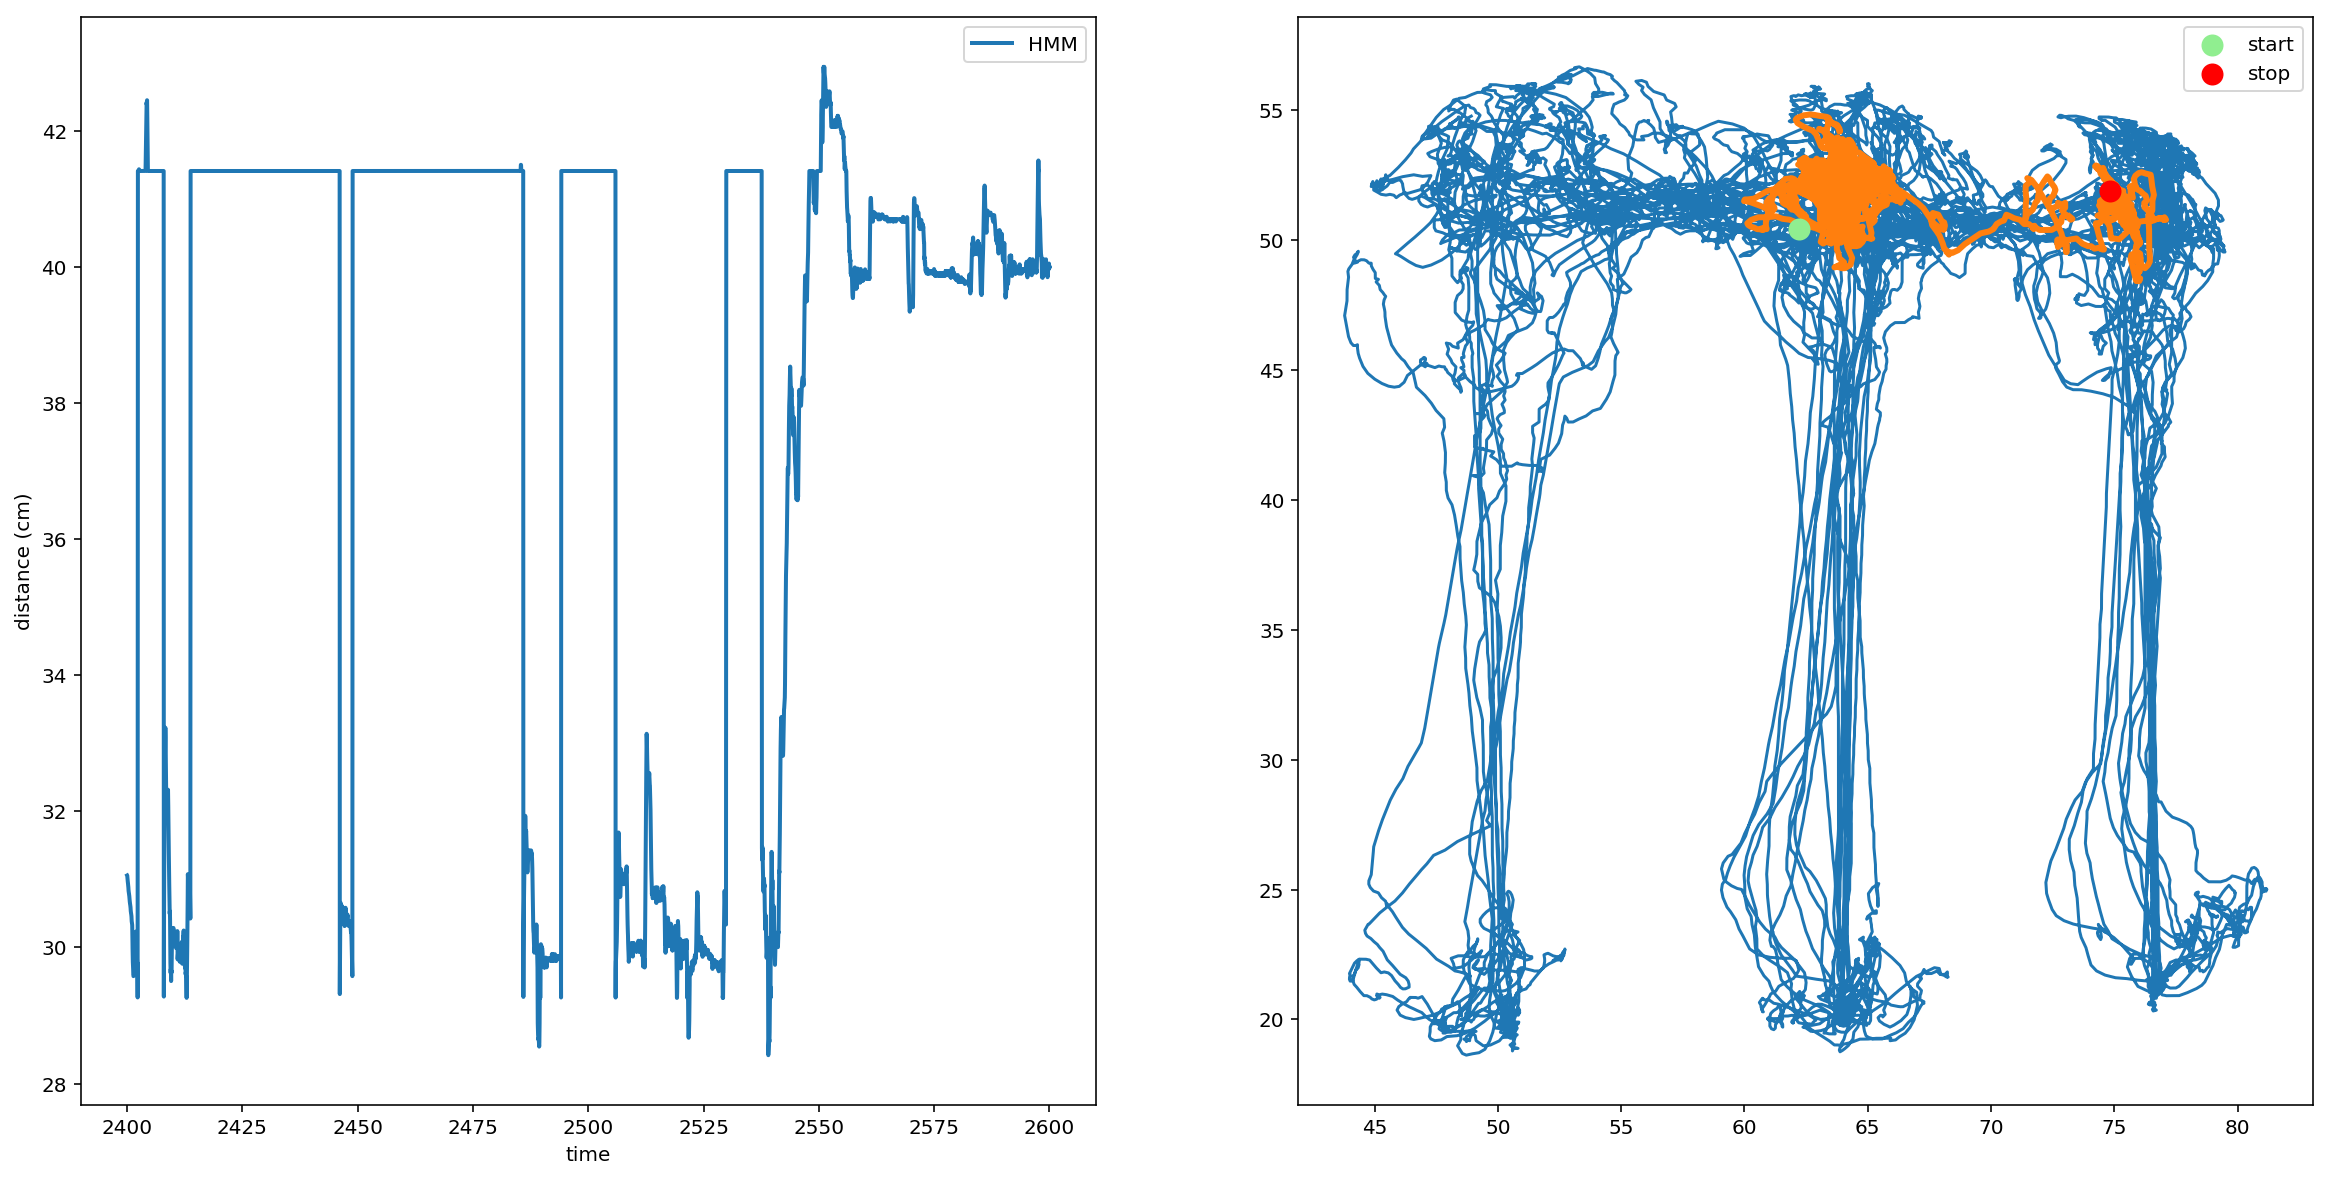

In [59]:
time = slice(2400, 2600)
plot_linear_distance(position_info, time)

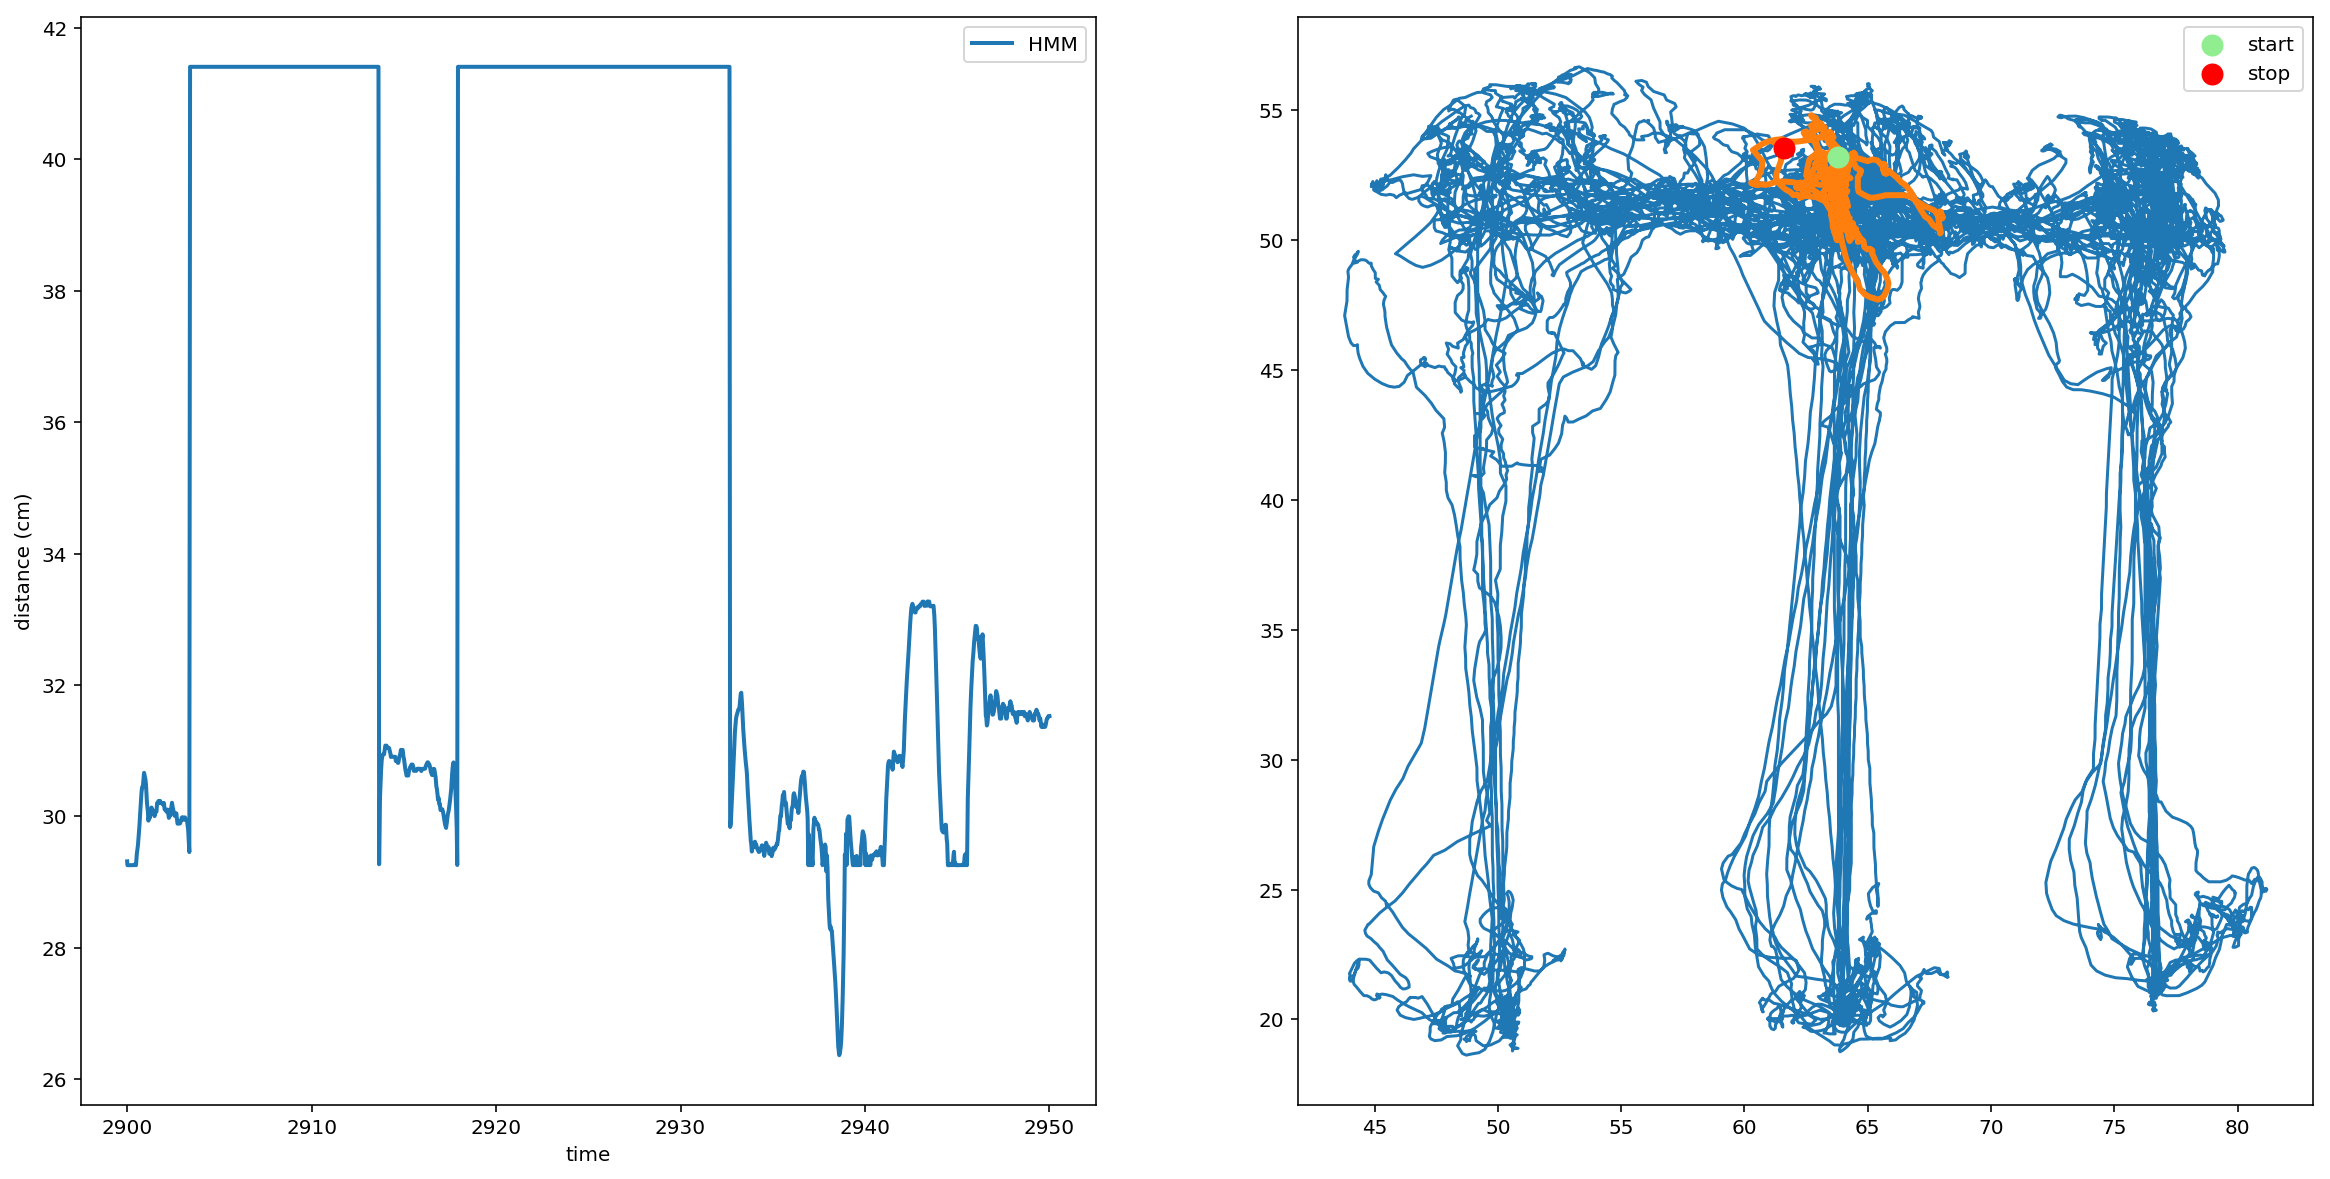

In [60]:
time = slice(2900, 2950)
plot_linear_distance(position_info, time)

In [61]:
epoch_key = ('JZ1', 7, 2)
position_info = lfdp.get_interpolated_position_dataframe(
    epoch_key, ANIMALS)

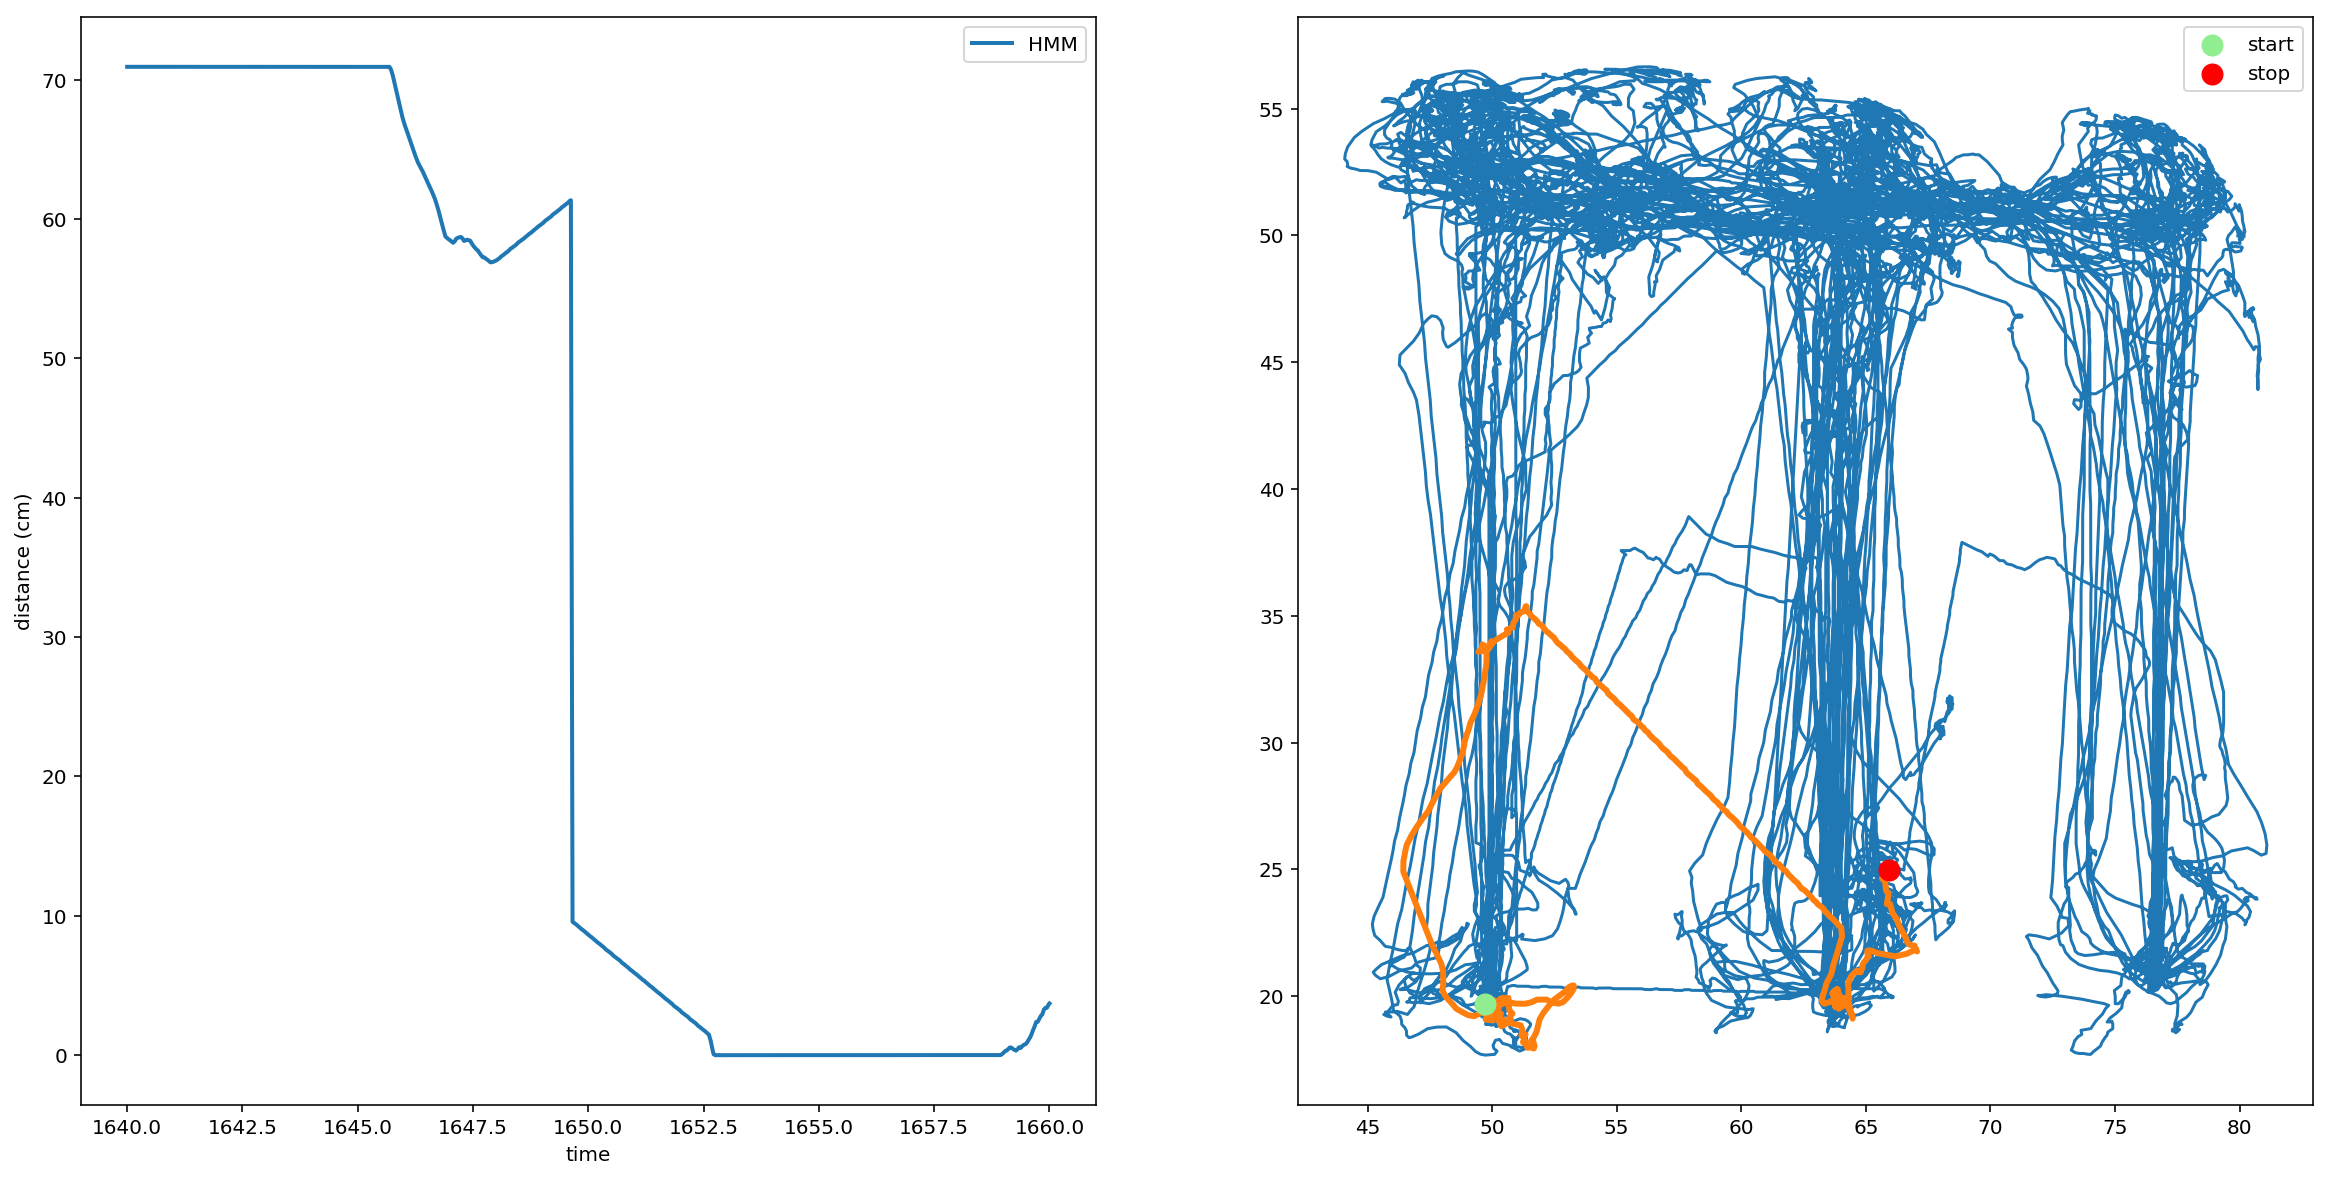

In [62]:
time = slice(1640, 1660)
plot_linear_distance(position_info, time)

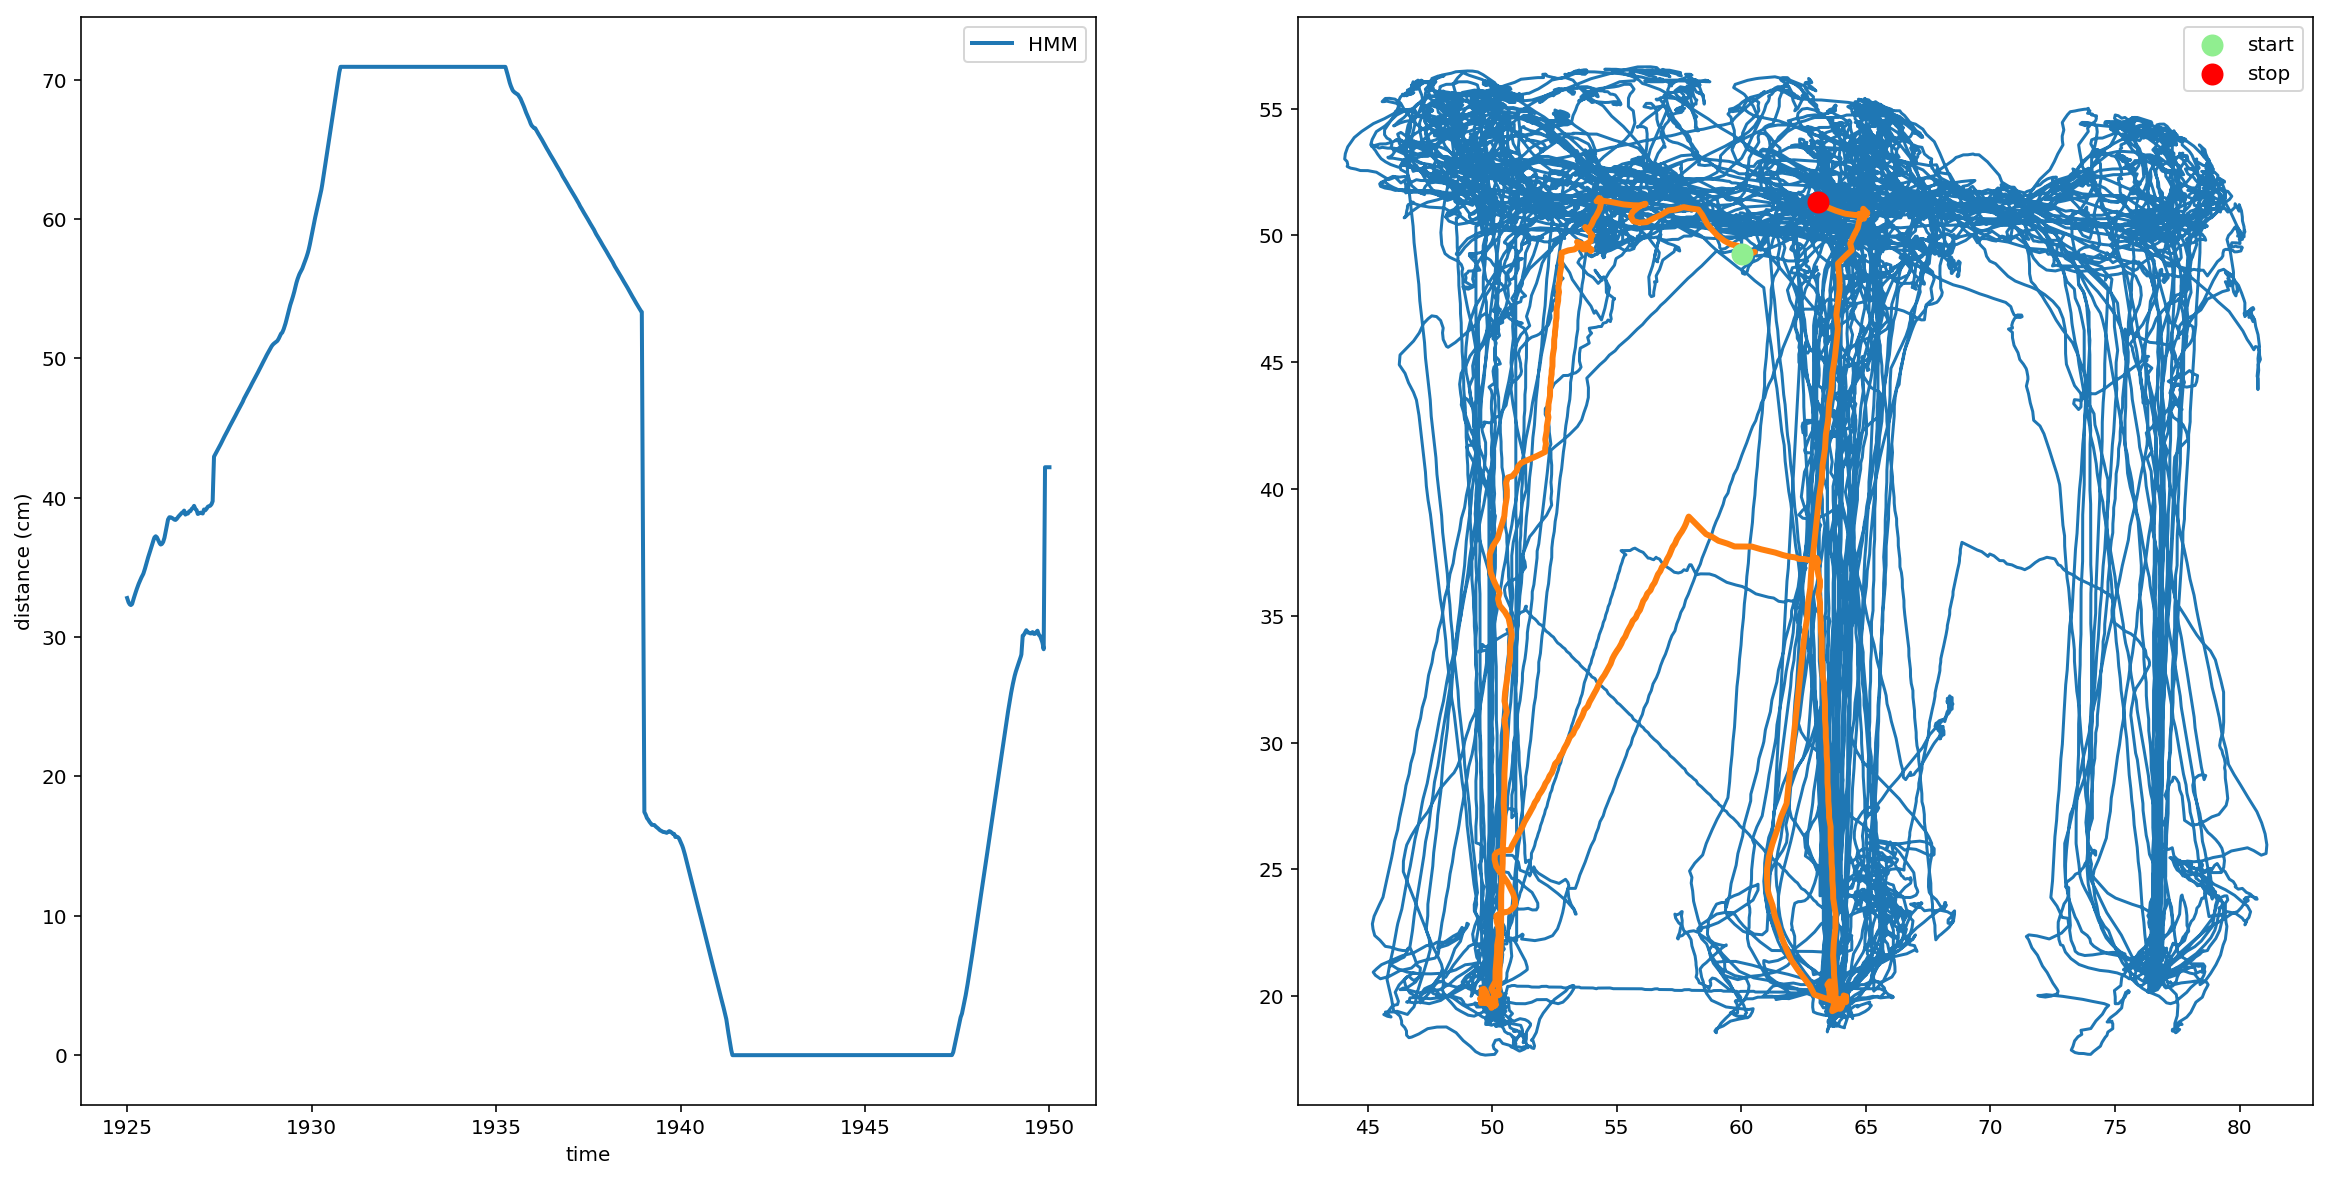

In [63]:
time = slice(1925, 1950)
plot_linear_distance(position_info, time)

In [64]:
('JZ1', 4, 2)
position_info = lfdp.get_interpolated_position_dataframe(
    epoch_key, ANIMALS)

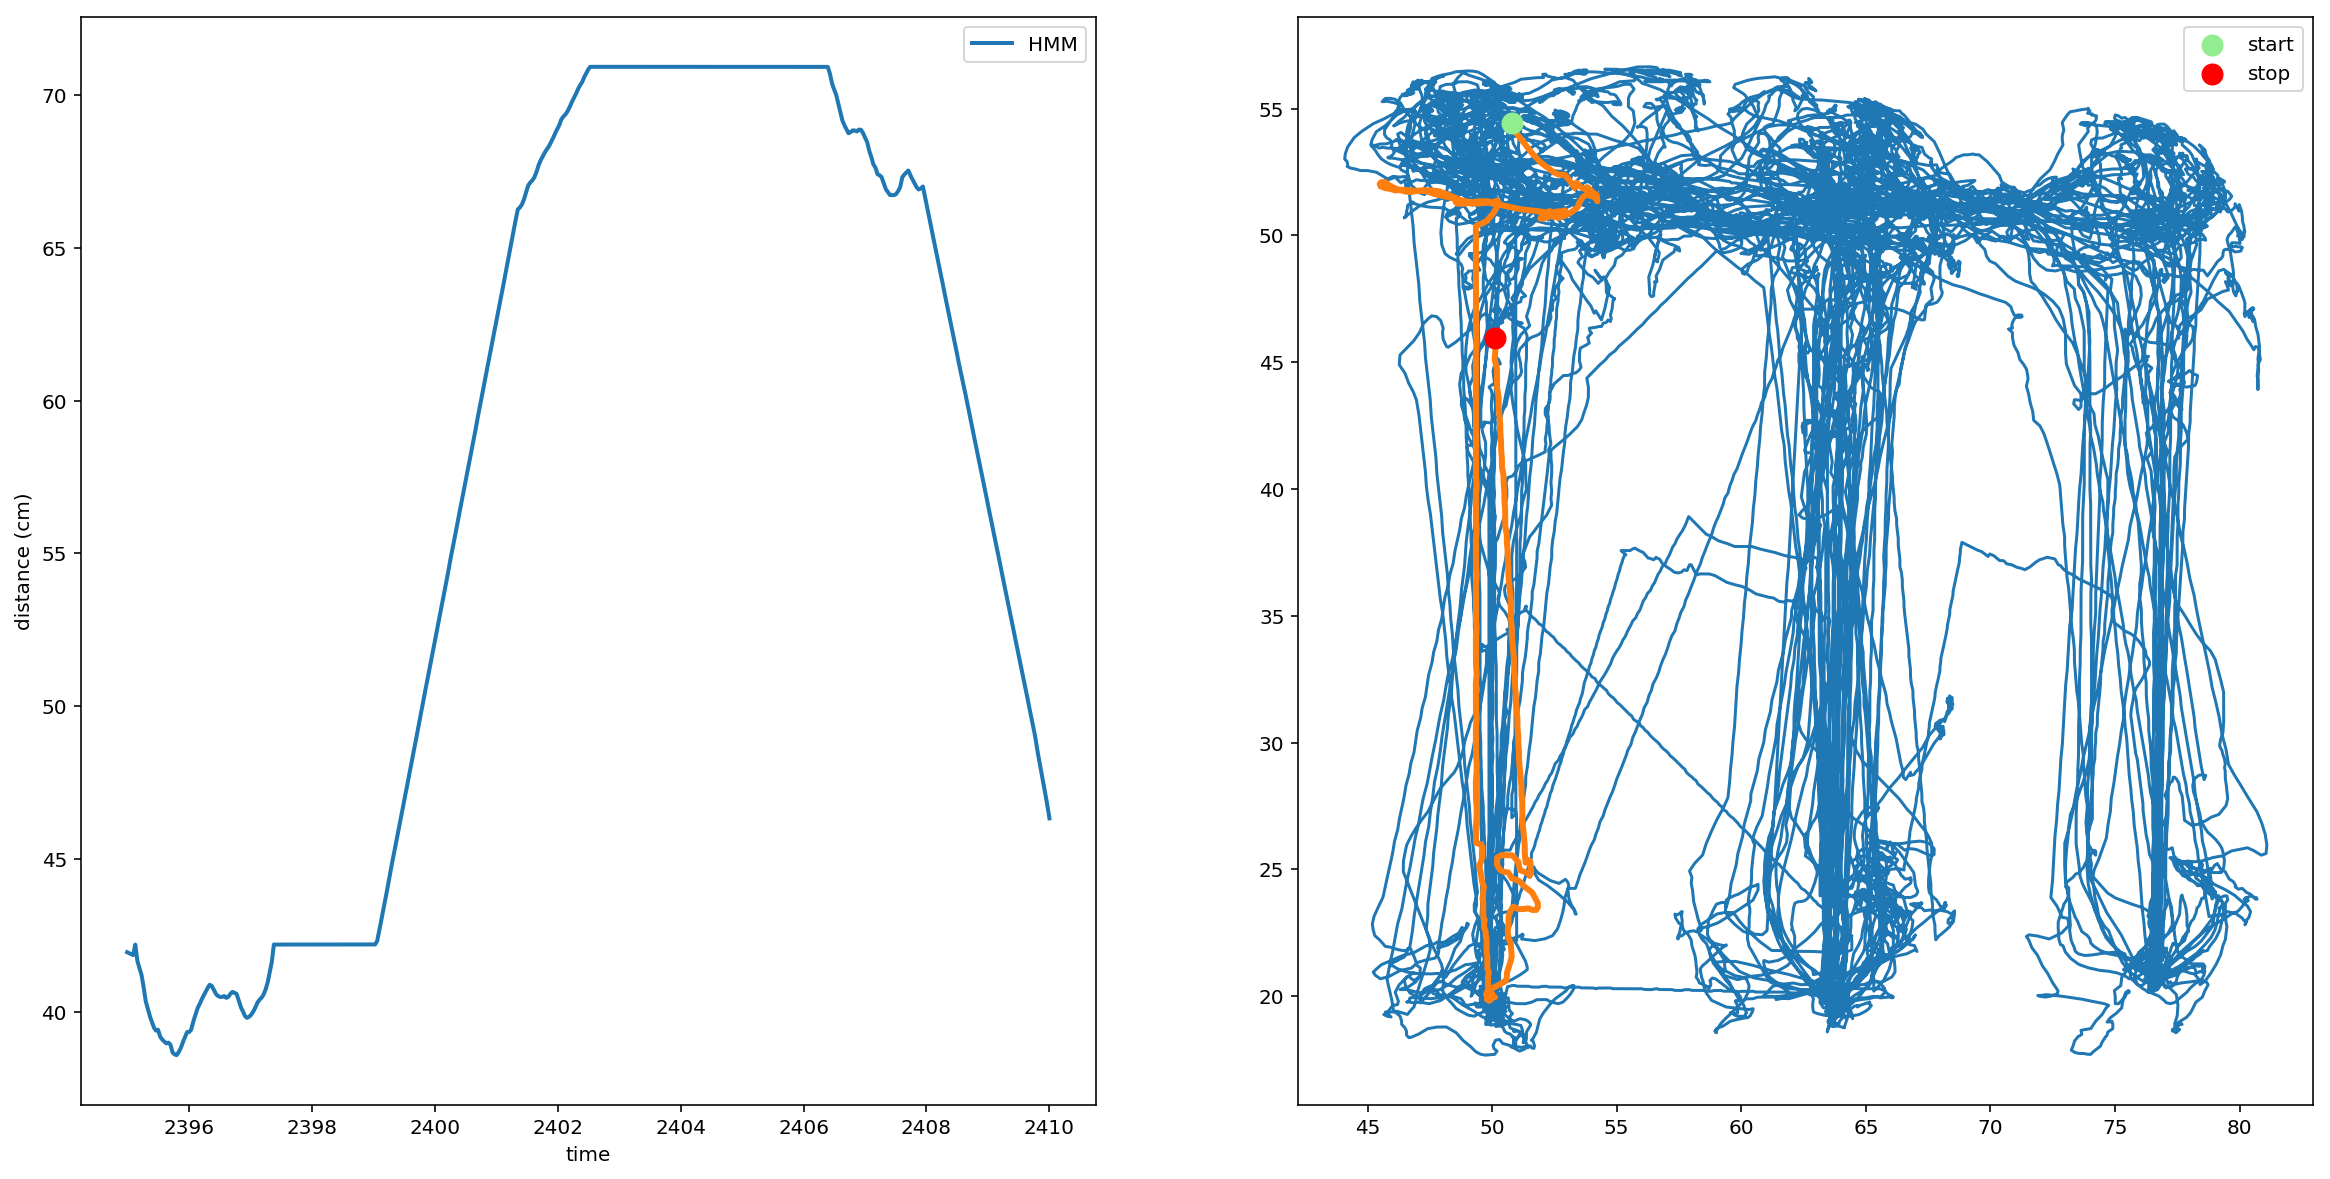

In [65]:
time = slice(2395, 2410)
plot_linear_distance(position_info, time)

In [66]:
epoch_key = ('JZ1', 3, 4)
position_info = lfdp.get_interpolated_position_dataframe(
    epoch_key, ANIMALS)

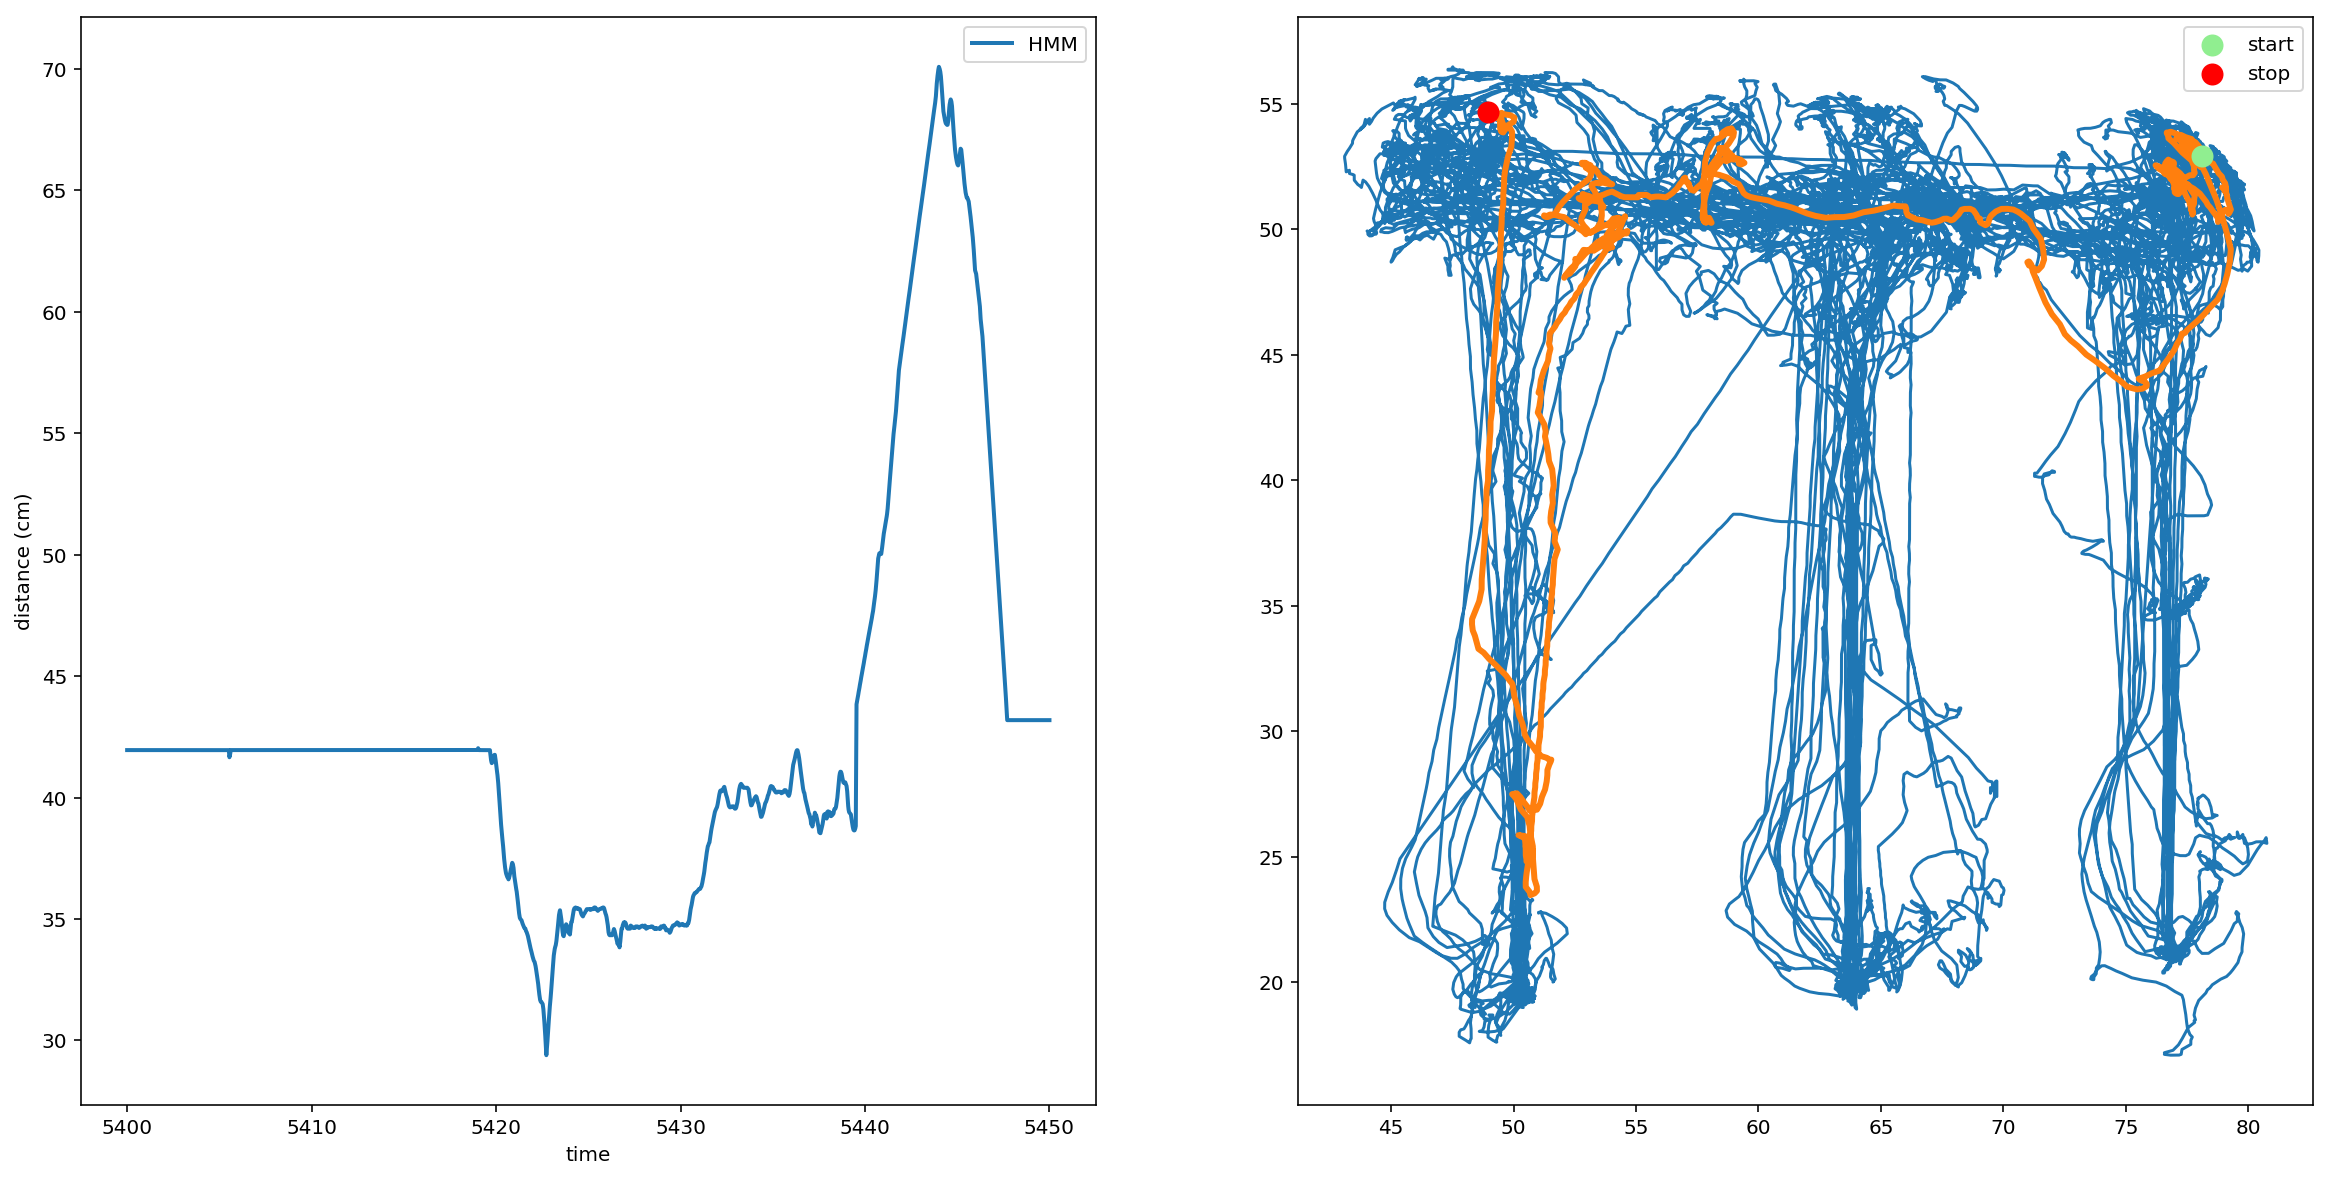

In [67]:
time = slice(5400, 5450)
plot_linear_distance(position_info, time)